# Utilizando o Método de Inferência de Mamdani
## Desenvolva um sistema de tomada de decisão que apresente, de modo qualitativo, a velocidade ótima de utilização de um veículo, do ponto de vista do menor consumo de combustível. O sistema deve utilizar três variáveis de entrada (velocidade, marcha e inclinação do terreno), uma de saída (consumo).
- Utilize o Método de Inferência de Mamdani.

- Particione o universo de discurso de cada uma das variáveis de entrada em, no mínimo, 3 conjuntos fuzzy e crie a base de conhecimentos.

- Facça simulações do funcionamento do sistema usando diferentes operadores (AND, OR, conjunção, agregação, defuzificação) e discuta os resultados encontrados.

## Escolha 1 cenário de entrada e mostre TODO o processo de cálculo da saída fuzzy, a partir das entradas definidas, com a indicação das regras disparadas e dos cálculos matemáticos realizados para se chegar à resposta obtida.

# Criando a base de dados

* A fórmula de **consumo** é apenas uma representação fictícia que combina as variáveis de entrada de forma arbitrária para criar um valor simulado de consumo, pois para modelar o consumo de combustível realista, é importante ter em mente que ele é afetado por uma série de fatores.

In [ ]:
import pandas as pd
import random

min_velocidade = 0 #km/h
max_velocidade = 120
min_marcha = 1
max_marcha = 6
min_inclinacao = -30 #graus
max_inclinacao = 30

# Criar uma lista de 100 amostras com valores aleatórios
amostras = []
for _ in range(100):
    velocidade = random.uniform(min_velocidade, max_velocidade)
    marcha = random.randint(min_marcha, max_marcha)
    inclinacao = random.uniform(min_inclinacao, max_inclinacao)
    amostras.append([velocidade, marcha, inclinacao])

colunas = ["Velocidade", "Marcha", "Inclinacao"]
df = pd.DataFrame(amostras, columns=colunas)

print(df)
# # Salve o DataFrame em um arquivo CSV
df.to_csv("base_de_dados_consumo.csv", index=False)



    Velocidade  Marcha  Inclinacao
0    87.379159       2   17.149529
1    59.584142       2  -19.781753
2    29.744205       1   19.255575
3    20.226601       3    4.566547
4    80.033014       6    7.806359
..         ...     ...         ...
95    2.117606       6   12.301437
96    9.678111       6   -6.817318
97  113.878847       2   27.673216
98   19.818006       4   19.394915
99   54.925467       4    9.317124

[100 rows x 3 columns]


# Sistema
### Feito a criação a base de dados, será feito o sistema

- Problema: Desenvolver um sistema de tomada de decisão que apresente a velocidade ótima de utilização de um veículo, do ponto de vista do menor consumo de combustível.

#### Universo de discurso:
- Velocidade = [0, 120] km/h
- Marcha = [1, 6] unids
- Inclinacao = [30, -30] graus
- Consumo =[0, 900] litros

### Mecanismo de inferência: Mamdani

### Funções de Pertinência: 3 Conjuntos Fuzzy para cada variavel:
-    Variável de Entrada: Velocidade
 - Função de Pertinência Baixa (VL): Representa velocidades baixas.
 - Função de Pertinência Média (VM): Representa velocidades médias.
 - Função de Pertinência Alta (VH): Representa velocidades altas.

- Variável de Entrada: Marcha
 - Função de Pertinência Baixa (ML): Representa marchas baixas.
 - Função de Pertinência Média (MM): Representa marchas médias.
 - Função de Pertinência Alta (MH): Representa marchas altas.

- Variável de Entrada: Inclinação do Terreno
 - Função de Pertinência Descida (ID): Representa inclinações suaves.
 - Função de Pertinência Reta (IR): Representa inclinações moderadas.
 - Função de Pertinência Subida (IS): Representa inclinações acentuadas.


### Definição dos Operadores
- Será utilizado todos os operadores  (AND, OR, conjunção,
agregação, defuzificação ) e será discutido os resultados encontrados.

### Definição da base de regras


### Ajustes necessarios

### Gráfico das funções de pertinência da variavél "Velocidade"

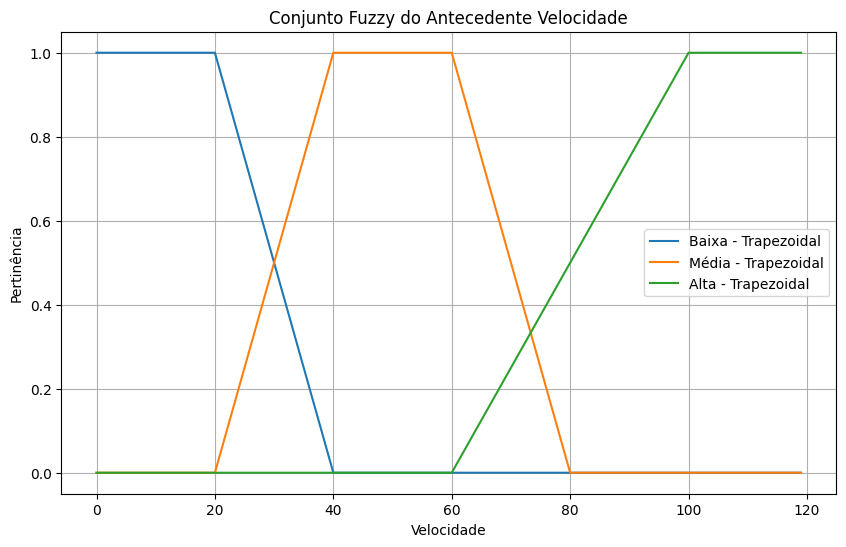

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Carregar os dados do arquivo CSV
caminho = "base_de_dados_consumo.csv"
df = pd.read_csv(caminho)

def trapezoidal(x, a, m, n, b):
    if x < a:
        return 0
    elif a <= x < m:
        return (x - a) / (m - a) if (m - a) != 0 else 0
    elif m <= x <= n:
        return 1
    elif n <= x < b:
        return (b - x) / (b - n) if (b - n) != 0 else 0
    elif x > b:
        return 0
    else:
        return 0

valores = df["Velocidade"]
funcoes_pertinenciatrapezoidal = {'Baixa': (0, 0, 20, 40), 'Média': (20, 40, 60, 80), 'Alta': (60, 100, 120, 120)}

# Plotar gráficos das funções de pertinência trapezoidal
x = np.arange(0, 120, 1)
plt.figure(figsize=(10, 6))

for chave, params in funcoes_pertinenciatrapezoidal.items():
    y = [trapezoidal(i, *params) for i in x]
    plt.plot(x, y, label=f'{chave} - Trapezoidal')

# Plotar somente um ponto para cada valor de "Velocidade" no eixo x
cores = ['green', 'blue', 'red']
for valor in valores:
    for i, chave in enumerate(funcoes_pertinenciatrapezoidal.keys()):
        params = funcoes_pertinenciatrapezoidal[chave]
        grau_pertinencia = trapezoidal(valor, *params)
        #plt.scatter([valor], [grau_pertinencia], marker='o', color=cores[i])

plt.xlabel("Velocidade")
plt.ylabel("Pertinência")
plt.title("Conjunto Fuzzy do Antecedente Velocidade")
plt.legend()
plt.grid(True)
plt.show()


### Gráfico das funções de pertinência da variavél "Marcha"

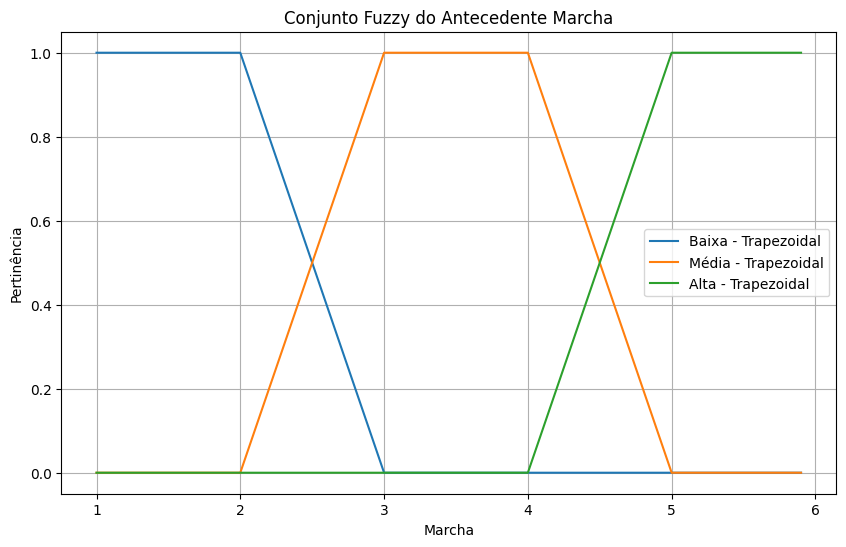

In [ ]:
# Carregar os dados do arquivo CSV
caminho = "base_de_dados_consumo.csv"
df = pd.read_csv(caminho)

def trapezoidal(x, a, m, n, b):
    if x < a:
        return 0
    elif a <= x < m:
        return (x - a) / (m - a) if (m - a) != 0 else 0
    elif m <= x <= n:
        return 1
    elif n <= x < b:
        return (b - x) / (b - n) if (b - n) != 0 else 0
    elif x > b:
        return 0
    else:
        return 0

valores = df["Marcha"]
funcoes_pertinenciatrapezoidal = {'Baixa': (1, 1, 2, 3), 'Média': (2, 3, 4, 5), 'Alta': (4, 5, 6, 6)}

# Plotar gráficos das funções de pertinência trapezoidal
x = np.arange(1, 6, 0.1)
plt.figure(figsize=(10, 6))

for chave, params in funcoes_pertinenciatrapezoidal.items():
    y = [trapezoidal(i, *params) for i in x]
    plt.plot(x, y, label=f'{chave} - Trapezoidal')

# Plotar somente um ponto para cada valor de "Marcha" no eixo x
cores = ['green', 'blue', 'red']
for valor in valores:
    for i, chave in enumerate(funcoes_pertinenciatrapezoidal.keys()):
        params = funcoes_pertinenciatrapezoidal[chave]
        grau_pertinencia = trapezoidal(valor, *params)

plt.xlabel("Marcha")
plt.ylabel("Pertinência")
plt.title("Conjunto Fuzzy do Antecedente Marcha")
plt.legend()
plt.grid(True)
plt.show()

### Gráfico das funções de pertinência da variavél "Inclinação"

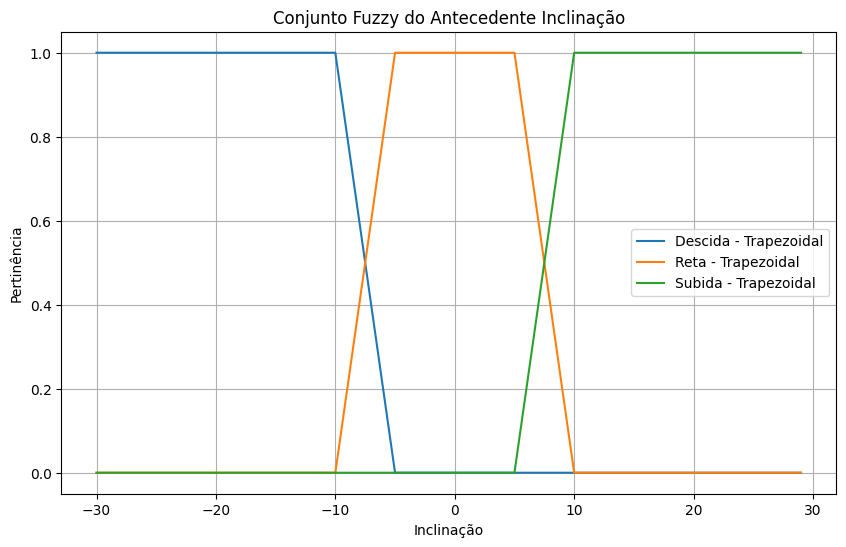

In [ ]:

valores = df["Inclinacao"]
funcoes_pertinenciatrapezoidal = {'Descida': (-30, -30, -10, -5), 'Reta': (-10, -5, 5, 10), 'Subida': (5, 10, 30, 30)}

# Plotar gráficos das funções de pertinência trapezoidal
x = np.arange(-30, 30, 1)
plt.figure(figsize=(10, 6))

for chave, params in funcoes_pertinenciatrapezoidal.items():
    y = [trapezoidal(i, *params) for i in x]
    plt.plot(x, y, label=f'{chave} - Trapezoidal')

# Plotar somente um ponto para cada valor de "Inclinaçao" no eixo x
cores = ['green', 'blue', 'red']
for valor in valores:
    for i, chave in enumerate(funcoes_pertinenciatrapezoidal.keys()):
        params = funcoes_pertinenciatrapezoidal[chave]
        grau_pertinencia = trapezoidal(valor, *params)
        #plt.scatter([valor], [grau_pertinencia], marker='o', color=cores[i])

plt.xlabel("Inclinação")
plt.ylabel("Pertinência")
plt.title("Conjunto Fuzzy do Antecedente Inclinação")
plt.legend()
plt.grid(True)
plt.show()


### Gráfico das funções de pertinência da variavél "Consumo"

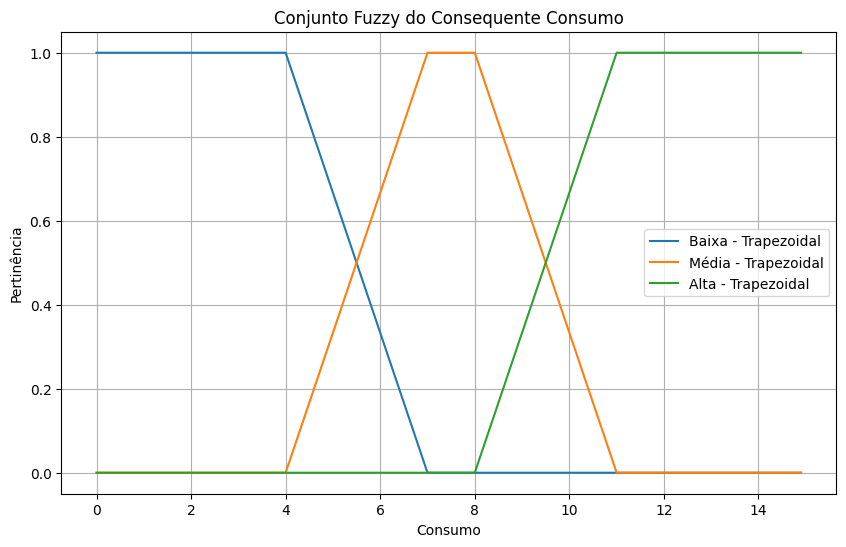

In [ ]:

funcoes_pertinenciatrapezoidal = {'Baixa': (0, 0, 4.0, 7.0), 'Média': (4.0, 7.0, 8.0, 11.0), 'Alta': (8.0, 11.0, 15.0, 15.0)}

# Plotar gráficos das funções de pertinência trapezoidal
x = np.arange(0, 15, 0.1)
plt.figure(figsize=(10, 6))

for chave, params in funcoes_pertinenciatrapezoidal.items():
    y = [trapezoidal(i, *params) for i in x]
    plt.plot(x, y, label=f'{chave} - Trapezoidal')

# Plotar somente um ponto para cada valor de "Consumo" no eixo x
cores = ['green', 'blue', 'red']
for valor in valores:
    for i, chave in enumerate(funcoes_pertinenciatrapezoidal.keys()):
        params = funcoes_pertinenciatrapezoidal[chave]
        grau_pertinencia = trapezoidal(valor, *params)
plt.xlabel("Consumo")
plt.ylabel("Pertinência")
plt.title("Conjunto Fuzzy do Consequente Consumo")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
#Variavel Antecedente Velocidade

def velocidade_baixa(velocidade):
  return trapezoidal(velocidade, 0, 0, 20, 40)

def velocidade_media(velocidade):
  return trapezoidal(velocidade, 20, 40, 60, 80)

def velocidade_alta(velocidade):
  return trapezoidal(velocidade, 60, 100, 120, 120)

#Variavel Antecedente Marcha

def marcha_baixa(marcha):
  return trapezoidal(marcha, 1, 1, 2, 3)

def marcha_media(marcha):
  return trapezoidal(marcha, 2, 3, 4, 5)

def marcha_alta(marcha):
  return trapezoidal(marcha, 4, 5, 6, 6)

#Variavel Antecedente Inclinação

def inclinacao_descida(inclinacao):
  return trapezoidal(inclinacao, -30, -30, -10, -5)

def inclinacao_reta(inclinacao):
  return trapezoidal(inclinacao, -10, -5, 5, 10)

def inclinacao_subida(inclinacao):
  return trapezoidal(inclinacao, 5, 10, 30, 30)

#Variavel Consequente Consumo

def consumo_baixo(consumo):
  return trapezoidal(consumo, 0, 0, 4.0, 7.0)

def consumo_medio(consumo):
  return trapezoidal(consumo, 4.0, 7.0, 8.0, 11.0)

def consumo_alto(consumo):
  return trapezoidal(consumo, 8.0, 11.0, 15.0, 15.0)


### Funçoes para grau de pertinencia de cada conjunto fuzzy do universo de discurso


### Conjunto de Regras


Regra Disparada:  4  - Grau de Disparo:  0.3
Regra Disparada:  5  - Grau de Disparo:  0.3
Regra Disparada:  10  - Grau de Disparo:  0.4
Regra Disparada:  11  - Grau de Disparo:  0.6
Grau de Ativação dos Conjuntos Fuzzy do Consequente:  {1: 0.4, 2: 0.6, 3: 0}
Consumo Final usando o Centróide:  5.5


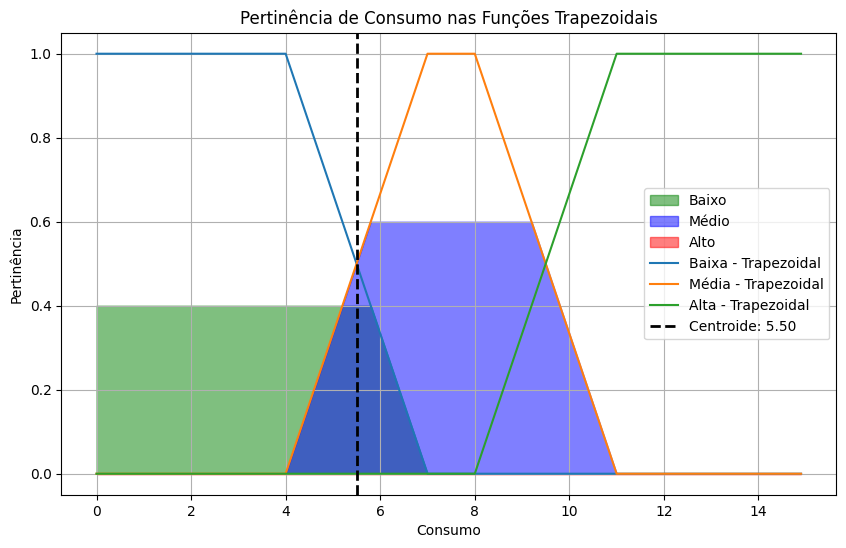

5.5

In [ ]:
#Conjunto de Regras
'''
Conjunto de Regras

Regra 1: Se VELOCIDADE é BAIXA & MARCHA é BAIXA & INCLINAÇÃO é DESCIDA entao CONSUMO BAIXO
Regra 2: Se VELOCIDADE é BAIXA & MARCHA é BAIXA & INCLINAÇÃO é RETA entao CONSUMO BAIXO
Regra 3: Se VELOCIDADE é BAIXA & MARCHA é BAIXA & INCLINAÇÃO é SUBIDA entao CONSUMO ALTO
Regra 4: Se VELOCIDADE é BAIXA & MARCHA é MEDIA & INCLINAÇÃO é DESCIDA entao CONSUMO MEDIO
Regra 5: Se VELOCIDADE é BAIXA & MARCHA é MEDIA & INCLINAÇÃO é RETA entao CONSUMO MEDIO
Regra 6: Se VELOCIDADE é BAIXA & MARCHA é MEDIA & INCLINAÇÃO é SUBIDA entao CONSUMO MEDIO

Regra 7: Se VELOCIDADE é MEDIA & MARCHA é BAIXA & INCLINAÇÃO é SUBIDA entao CONSUMO ALTO
Regra 8: Se VELOCIDADE é MEDIA & MARCHA é BAIXA & INCLINAÇÃO é PLANO entao CONSUMO ALTO
Regra 9: Se VELOCIDADE é MEDIA & MARCHA é BAIXA & INCLINAÇÃO é DESCIDA entao CONSUMO MEDIO
Regra 10: Se VELOCIDADE é MEDIA & MARCHA é MEDIA & INCLINAÇÃO é DESCIDA entao CONSUMO BAIXO
Regra 11: Se VELOCIDADE é MEDIA & MARCHA é MEDIA & INCLINAÇÃO é RETA entao CONSUMO MEDIO
Regra 12: Se VELOCIDADE é MEDIA & MARCHA é MEDIA & INCLINAÇÃO é SUBIDA entao CONSUMO ALTO
Regra 13: Se VELOCIDADE é MEDIA & MARCHA é ALTA & INCLINAÇÃO é DESCIDA entao CONSUMO MEDIO
Regra 14: Se VELOCIDADE é MEDIA & MARCHA é ALTA & INCLINAÇÃO é RETA entao CONSUMO ALTO
Regra 15: Se VELOCIDADE é MEDIA & MARCHA é ALTA & INCLINAÇÃO é SUBIDA entao CONSUMO ALTO

Regra 16: Se VELOCIDADE é ALTA & MARCHA é MEDIA & INCLINAÇÃO é DESCIDA entao CONSUMO MEDIO
Regra 17: Se VELOCIDADE é ALTA & MARCHA é MEDIA & INCLINAÇÃO é RETA entao CONSUMO ALTO
Regra 18: Se VELOCIDADE é ALTA & MARCHA é MEDIA & INCLINAÇÃO é SUBIDA entao CONSUMO ALTO
Regra 19: Se VELOCIDADE é ALTA & MARCHA é ALTA & INCLINAÇÃO é DESCIDA entao CONSUMO MEDIO
Regra 20: Se VELOCIDADE é ALTA & MARCHA é ALTA & INCLINAÇÃO é RETA entao CONSUMO ALTO
Regra 21: Se VELOCIDADE é ALTA & MARCHA é ALTA & INCLINAÇÃO é SUBIDA entao CONSUMO ALTO

'''
def InferenciaFuzzy(velocidade, marcha, inclinacao):
    # Ativação das regras
    regras_disparadas = {}

    adicionar_regra_disparada = lambda regra, ativacao: regras_disparadas.update({regra: ativacao}) if ativacao > 0 else None
    # Regra 1
    adicionar_regra_disparada('1', min(velocidade_baixa(velocidade), marcha_baixa(marcha), inclinacao_descida(inclinacao)))

    # Regra 2
    adicionar_regra_disparada('2', min(velocidade_baixa(velocidade), marcha_baixa(marcha), inclinacao_reta(inclinacao)))

    # Regra 3
    adicionar_regra_disparada('3', min(velocidade_baixa(velocidade), marcha_baixa(marcha), inclinacao_subida(inclinacao)))
    # Regra 4
    adicionar_regra_disparada('4',  min(velocidade_baixa(velocidade), marcha_media(marcha), inclinacao_descida(inclinacao)))

    # Regra 5
    adicionar_regra_disparada('5',  min(velocidade_baixa(velocidade), marcha_media(marcha), inclinacao_reta(inclinacao)))

    # Regra 6
    adicionar_regra_disparada('6',  min(velocidade_baixa(velocidade), marcha_media(marcha), inclinacao_subida(inclinacao)))

    # Regra 7
    adicionar_regra_disparada('7',  min(velocidade_media(velocidade), marcha_baixa(marcha), inclinacao_subida(inclinacao)))

    # Regra 8
    adicionar_regra_disparada('8',  min(velocidade_media(velocidade), marcha_baixa(marcha), inclinacao_reta(inclinacao)))

    # Regra 9
    adicionar_regra_disparada('9',  min(velocidade_media(velocidade), marcha_baixa(marcha), inclinacao_descida(inclinacao)))

    # Regra 10
    adicionar_regra_disparada('10',  min(velocidade_media(velocidade), marcha_media(marcha), inclinacao_descida(inclinacao)))

    # Regra 11
    adicionar_regra_disparada('11',  min(velocidade_media(velocidade), marcha_media(marcha), inclinacao_reta(inclinacao)))

    # Regra 12
    adicionar_regra_disparada('12', min(velocidade_media(velocidade), marcha_media(marcha), inclinacao_subida(inclinacao)))

    # Regra 13
    adicionar_regra_disparada('13', min(velocidade_media(velocidade), marcha_alta(marcha), inclinacao_descida(inclinacao)))

    # Regra 14
    adicionar_regra_disparada('14', min(velocidade_media(velocidade), marcha_alta(marcha), inclinacao_reta(inclinacao)))

    # Regra 15
    adicionar_regra_disparada('15', min(velocidade_media(velocidade), marcha_alta(marcha), inclinacao_subida(inclinacao)))

    # Regra 16
    adicionar_regra_disparada('16', min(velocidade_alta(velocidade), marcha_media(marcha), inclinacao_descida(inclinacao)))

    # Regra 17
    adicionar_regra_disparada('17', min(velocidade_alta(velocidade), marcha_media(marcha), inclinacao_reta(inclinacao)))

    # Regra 18
    adicionar_regra_disparada('18', min(velocidade_alta(velocidade), marcha_media(marcha), inclinacao_subida(inclinacao)))

    # Regra 19
    adicionar_regra_disparada('19', min(velocidade_alta(velocidade), marcha_alta(marcha), inclinacao_descida(inclinacao)))

    # Regra 20
    adicionar_regra_disparada('20', min(velocidade_alta(velocidade), marcha_alta(marcha), inclinacao_reta(inclinacao)))

    # Regra 21
    adicionar_regra_disparada('21', min(velocidade_alta(velocidade), marcha_alta(marcha), inclinacao_subida(inclinacao)))


    for regra, ativacao in regras_disparadas.items():
       print("Regra Disparada: ", regra, " - Grau de Disparo: ", ativacao)

    # Dicionário para manter as regras ativadas em cada conjunto
    consumo_conjuntos_ativados = {
        1: [],
        2: [],
        3: [],
    }

    # Mapeamento das regras para conjuntos
    mapeamento_regras = {
        '1': 1,
        '2': 1,
        '3': 2,
        '4': 1,
        '5': 1,
        '6': 2,
        '7': 3,
        '8': 2,
        '9': 1,
        '10': 1,
        '11': 2,
        '12': 3,
        '13': 1,
        '14': 2,
        '15': 3,
        '16': 2,
        '17': 3,
        '18': 3,
        '19': 2,
        '20': 3,
        '21': 3,
    }

    # Adicione regras ativadas a seus respectivos conjuntos
    for regra, ativacao in regras_disparadas.items():
        conjunto = mapeamento_regras[regra]
        consumo_conjuntos_ativados[conjunto].append(ativacao)

    # Calcule o máximo para cada conjunto
    max_conjunto_1 = max(consumo_conjuntos_ativados[1]) if consumo_conjuntos_ativados[1] else 0
    max_conjunto_2 = max(consumo_conjuntos_ativados[2]) if consumo_conjuntos_ativados[2] else 0
    max_conjunto_3 = max(consumo_conjuntos_ativados[3]) if consumo_conjuntos_ativados[3] else 0

    # Transformar a estrutura para chave, valor
    consumo_conjuntos_ativados = {
      1: max_conjunto_1,
      2: max_conjunto_2,
      3: max_conjunto_3,
    }

    numerador = 0
    denominador = 0


    print("Grau de Ativação dos Conjuntos Fuzzy do Consequente: ", consumo_conjuntos_ativados)

    # Valores dos pontos que definem os conjuntos fuzzy
    a_baixo, m_baixo, n_baixo, b_baixo = 0, 0, 4.0, 7.0
    a_medio, m_medio, n_medio, b_medio = 4.0, 7.0, 8.0, 11.0
    a_alto, m_alto, n_alto, b_alto = 8.0, 11.0, 15.0, 15.0

    for conjunto, altura in consumo_conjuntos_ativados.items():
        # Calcule o centroide do conjunto com base nos valores apropriados
        if conjunto == 1:
            x_bar = (a_baixo + 2 * m_baixo + 2 * n_baixo + b_baixo) / 6
        elif conjunto == 2:
            x_bar = (a_medio + 2 * m_medio + 2 * n_medio + b_medio) / 6
        elif conjunto == 3:
            x_bar = (a_alto + 2 * m_alto + 2 * n_alto + b_alto) / 6

        # Multiplique o centroide pelo grau de pertinência (altura)
        numerador += x_bar * altura

        # Some as alturas para calcular o denominador
        denominador += altura

    if denominador == 0:
      consumo_final = 0
    else:
      consumo_final = numerador / denominador

      print("Consumo Final usando o Centróide: ", consumo_final)
      s_c = {'Baixa': (0, 0, 4.0, 7.0), 'Média': (4.0, 7.0, 8.0, 11.0), 'Alta': (8.0, 11.0, 15.0, 15.0)}
     # Plotar gráficos das funções de pertinência trapezoidal
      x = np.arange(0, 15, 0.1)

      plt.figure(figsize=(10, 6))

      for chave, valor in consumo_conjuntos_ativados.items():
             if chave == 1:
                 y_baixo = np.array([trapezoidal(i, *s_c['Baixa']) for i in x])
                 plt.fill_between(x, 0, np.minimum(y_baixo, valor), alpha=0.5, color='green', label="Baixo")
             elif chave == 2:
                 y_medio = np.array([trapezoidal(i, *s_c['Média']) for i in x])
                 plt.fill_between(x, 0, np.minimum(y_medio, valor), alpha=0.5, color='blue', label="Médio")
             elif chave == 3:
                 y_alto = np.array([trapezoidal(i, *s_c['Alta']) for i in x])
                 plt.fill_between(x, 0, np.minimum(y_alto, valor), alpha=0.5, color='red', label="Alto")

      # Finalize o gráfico
      for chave, params in s_c.items():
          y = [trapezoidal(i, *params) for i in x]
          plt.plot(x, y, label=f'{chave} - Trapezoidal')

    #Plotar o centroide (linha vertical)
    plt.axvline(x=consumo_final, color='k', linestyle='--', label='Centroide: {:.2f}'.format(consumo_final),linewidth=2)

    plt.xlabel("Consumo")
    plt.ylabel("Pertinência")
    plt.title("Pertinência de Consumo nas Funções Trapezoidais")
    plt.legend()
    plt.grid(True)
    plt.show()

    return consumo_final

# Cenário de Entrada
velocidade = 34
marcha = 4
inclinacao = -7
InferenciaFuzzy(velocidade, marcha, inclinacao)

Grau de Ativação dos Conjuntos Fuzzy do Consequente:  {1: 0, 2: 0, 3: 0}


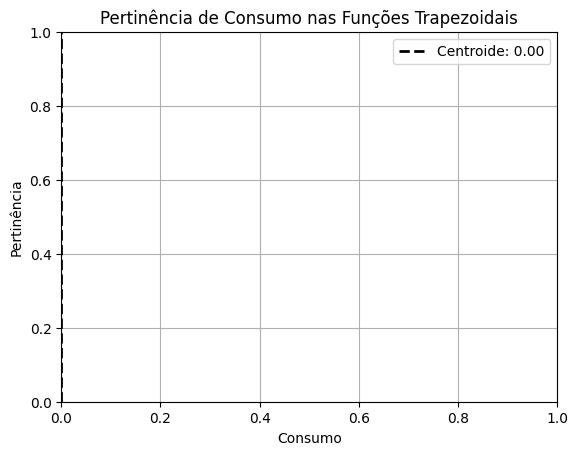

Regra Disparada:  9  - Grau de Disparo:  1
Grau de Ativação dos Conjuntos Fuzzy do Consequente:  {1: 1, 2: 0, 3: 0}
Consumo Final usando o Centróide:  2.5


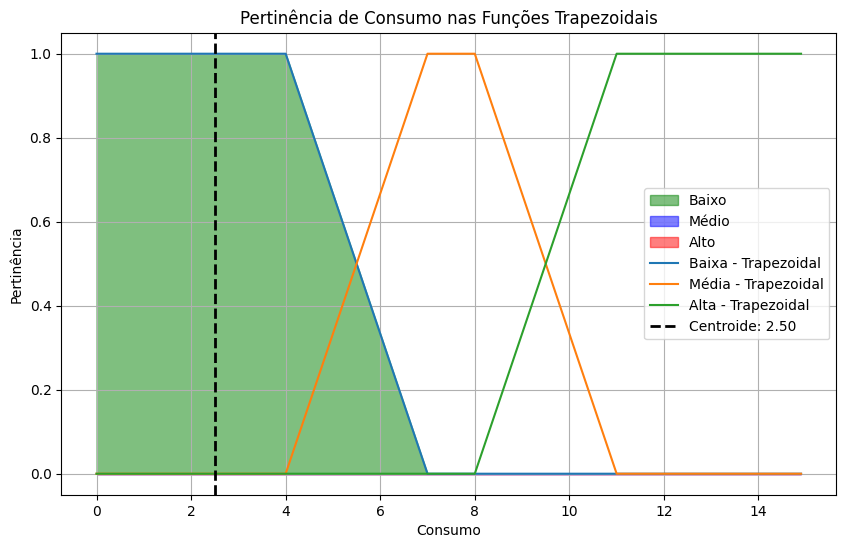

Regra Disparada:  3  - Grau de Disparo:  0.512789768867598
Regra Disparada:  7  - Grau de Disparo:  0.4872102311324021
Grau de Ativação dos Conjuntos Fuzzy do Consequente:  {1: 0, 2: 0.512789768867598, 3: 0.4872102311324021}
Consumo Final usando o Centróide:  9.93605115566201


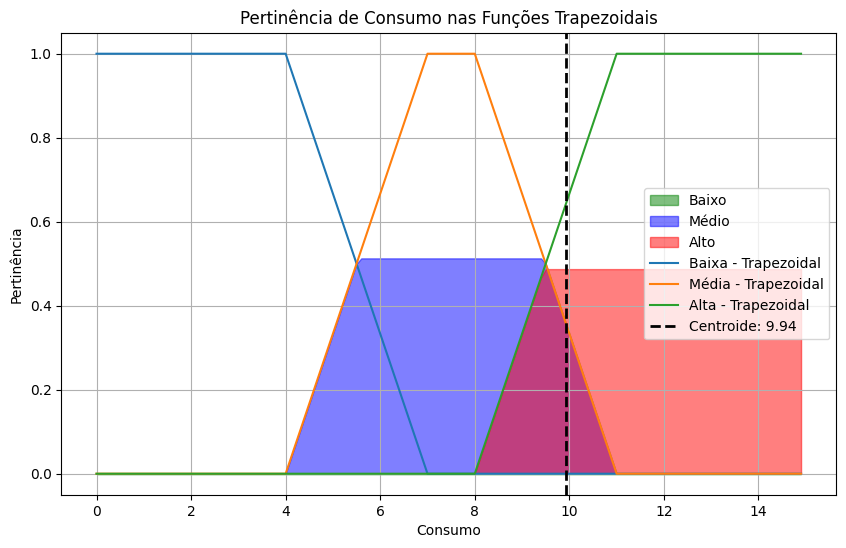

Regra Disparada:  5  - Grau de Disparo:  0.9886699309220311
Regra Disparada:  11  - Grau de Disparo:  0.01133006907796883
Grau de Ativação dos Conjuntos Fuzzy do Consequente:  {1: 0.9886699309220311, 2: 0.01133006907796883, 3: 0}
Consumo Final usando o Centróide:  2.556650345389844


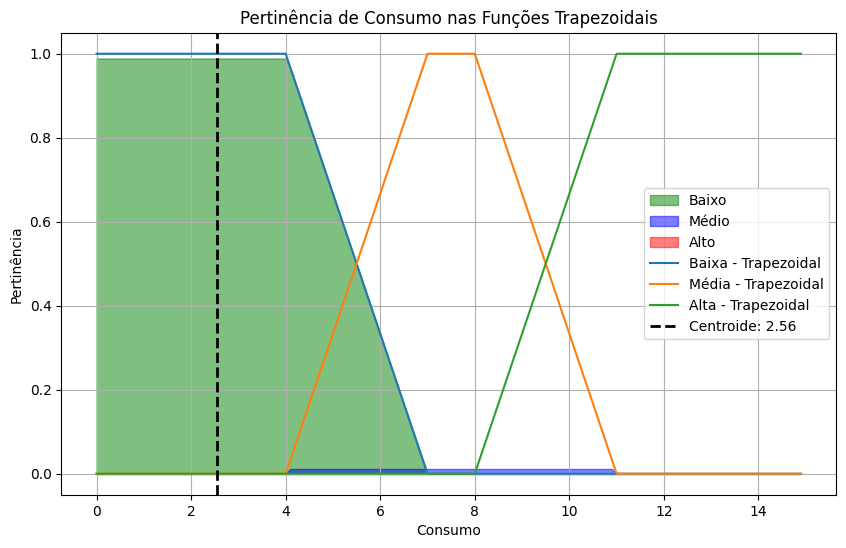

Regra Disparada:  20  - Grau de Disparo:  0.43872816406304765
Regra Disparada:  21  - Grau de Disparo:  0.5008253441494794
Grau de Ativação dos Conjuntos Fuzzy do Consequente:  {1: 0, 2: 0, 3: 0.5008253441494794}
Consumo Final usando o Centróide:  12.5


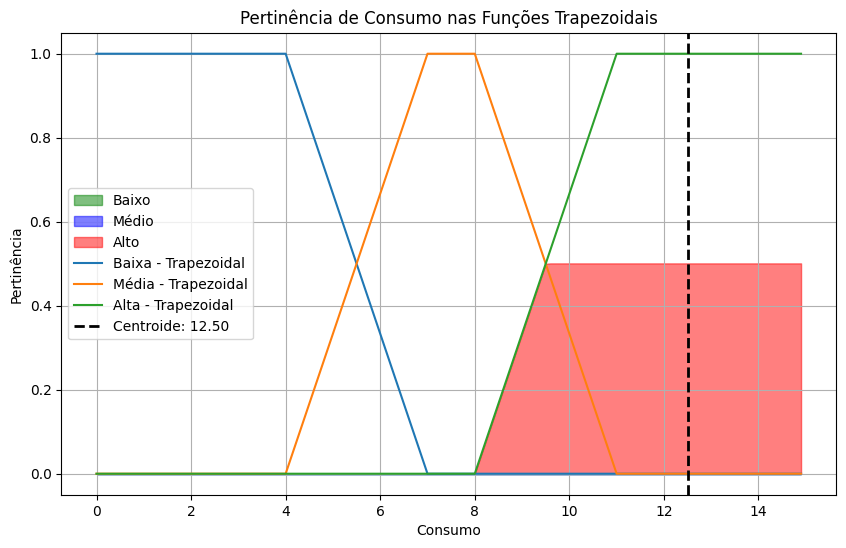

Grau de Ativação dos Conjuntos Fuzzy do Consequente:  {1: 0, 2: 0, 3: 0}


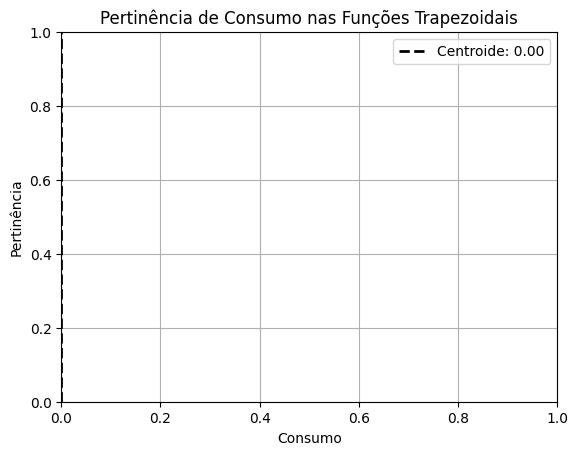

Regra Disparada:  15  - Grau de Disparo:  0.2772881491713761
Regra Disparada:  21  - Grau de Disparo:  0.36135592541431194
Grau de Ativação dos Conjuntos Fuzzy do Consequente:  {1: 0, 2: 0, 3: 0.36135592541431194}
Consumo Final usando o Centróide:  12.5


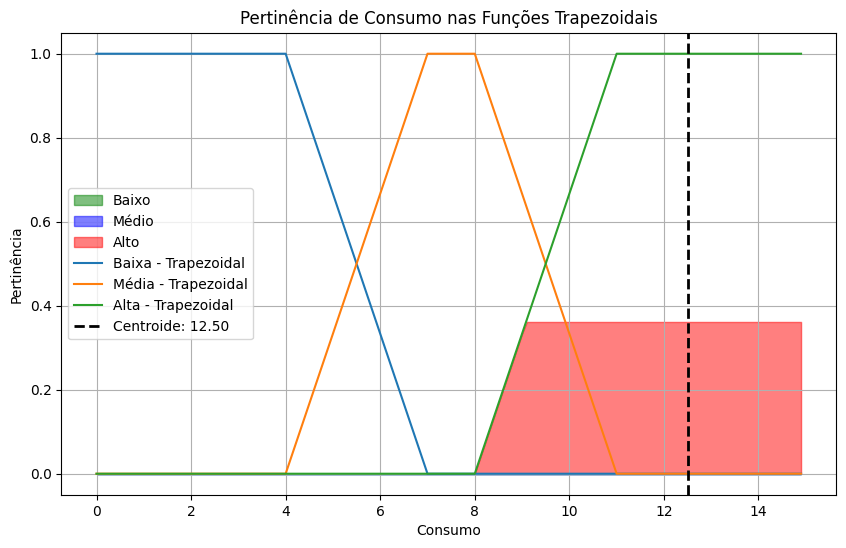

Regra Disparada:  10  - Grau de Disparo:  1
Grau de Ativação dos Conjuntos Fuzzy do Consequente:  {1: 1, 2: 0, 3: 0}
Consumo Final usando o Centróide:  2.5


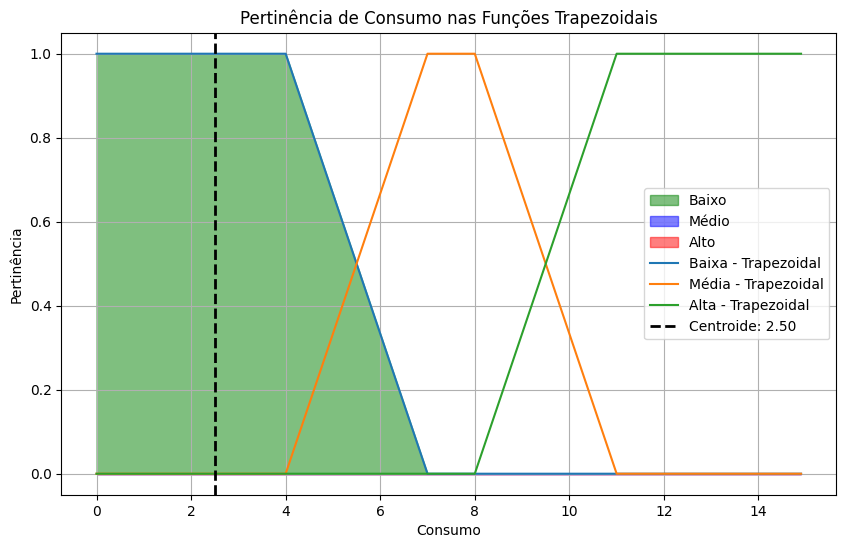

Regra Disparada:  18  - Grau de Disparo:  1
Grau de Ativação dos Conjuntos Fuzzy do Consequente:  {1: 0, 2: 0, 3: 1}
Consumo Final usando o Centróide:  12.5


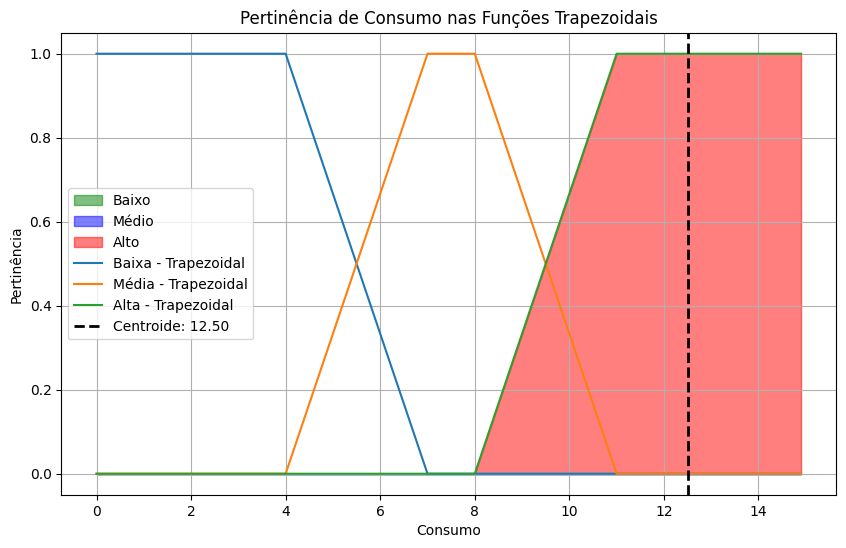

Regra Disparada:  4  - Grau de Disparo:  1
Grau de Ativação dos Conjuntos Fuzzy do Consequente:  {1: 1, 2: 0, 3: 0}
Consumo Final usando o Centróide:  2.5


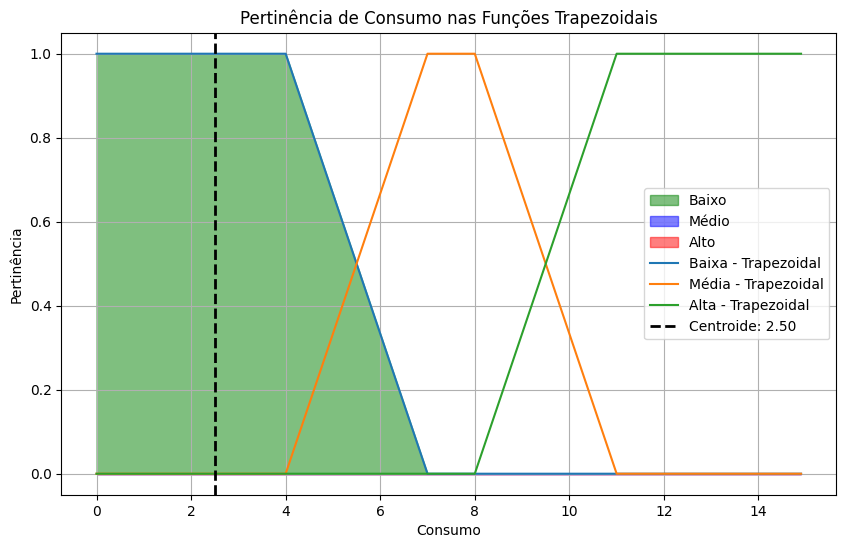

Regra Disparada:  1  - Grau de Disparo:  0.645502650456194
Regra Disparada:  9  - Grau de Disparo:  0.3544973495438059
Grau de Ativação dos Conjuntos Fuzzy do Consequente:  {1: 0.645502650456194, 2: 0, 3: 0}
Consumo Final usando o Centróide:  2.5


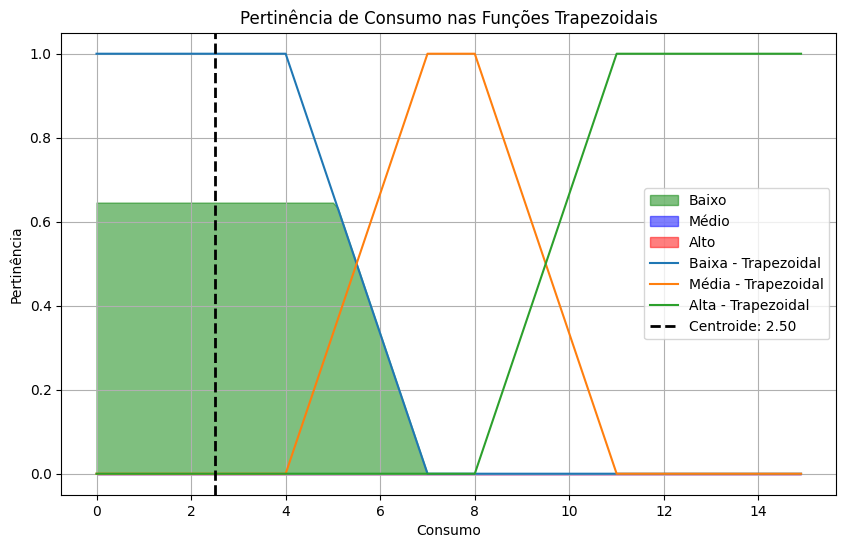

Regra Disparada:  6  - Grau de Disparo:  1
Grau de Ativação dos Conjuntos Fuzzy do Consequente:  {1: 0, 2: 1, 3: 0}
Consumo Final usando o Centróide:  7.5


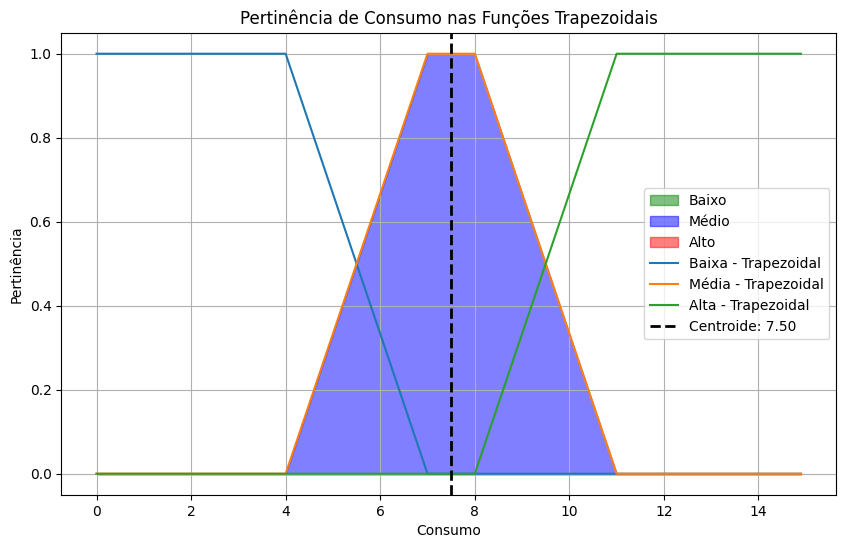

Regra Disparada:  21  - Grau de Disparo:  1
Grau de Ativação dos Conjuntos Fuzzy do Consequente:  {1: 0, 2: 0, 3: 1}
Consumo Final usando o Centróide:  12.5


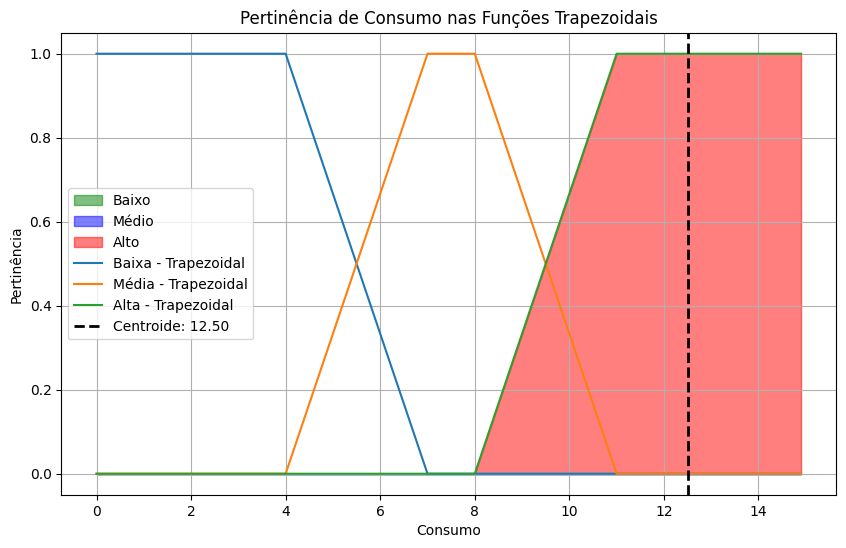

Regra Disparada:  9  - Grau de Disparo:  1
Grau de Ativação dos Conjuntos Fuzzy do Consequente:  {1: 1, 2: 0, 3: 0}
Consumo Final usando o Centróide:  2.5


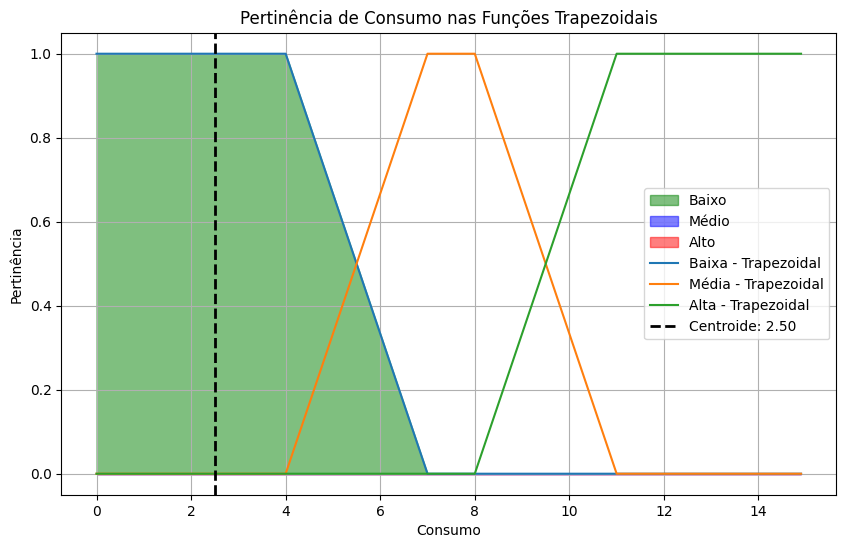

Regra Disparada:  18  - Grau de Disparo:  0.7311541194251155
Grau de Ativação dos Conjuntos Fuzzy do Consequente:  {1: 0, 2: 0, 3: 0.7311541194251155}
Consumo Final usando o Centróide:  12.5


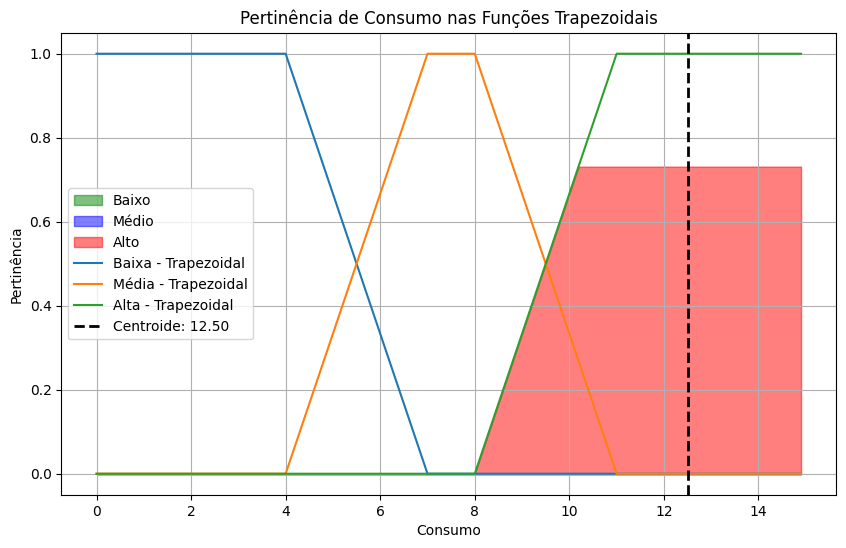

Grau de Ativação dos Conjuntos Fuzzy do Consequente:  {1: 0, 2: 0, 3: 0}


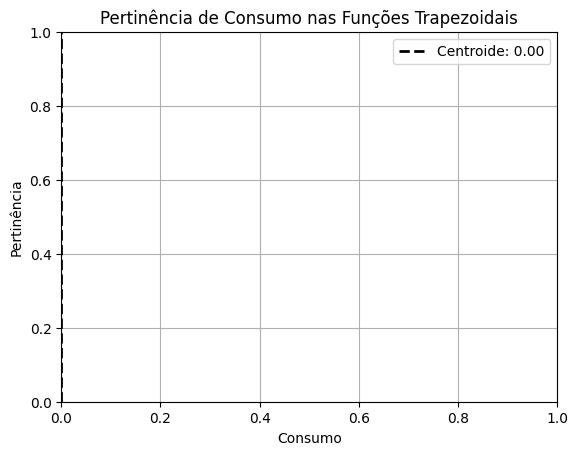

Regra Disparada:  17  - Grau de Disparo:  1
Grau de Ativação dos Conjuntos Fuzzy do Consequente:  {1: 0, 2: 0, 3: 1}
Consumo Final usando o Centróide:  12.5


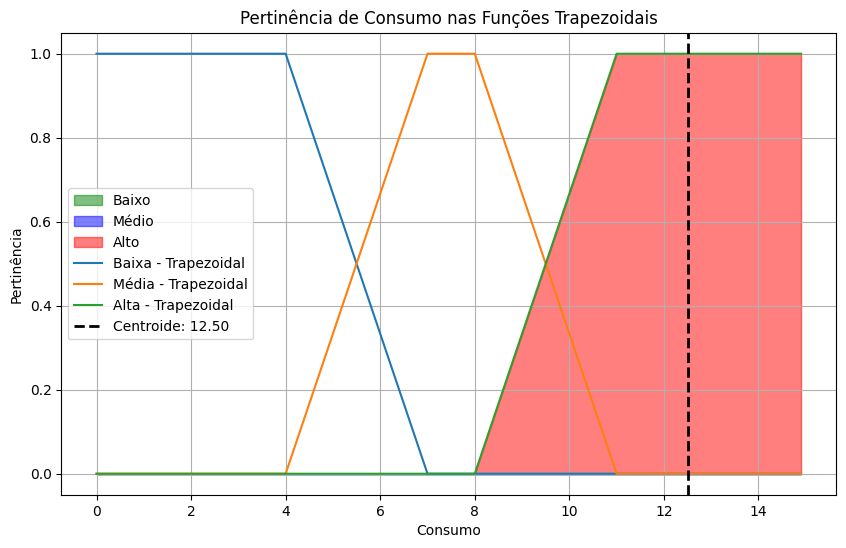

Regra Disparada:  14  - Grau de Disparo:  0.41040522425481196
Grau de Ativação dos Conjuntos Fuzzy do Consequente:  {1: 0, 2: 0.41040522425481196, 3: 0}
Consumo Final usando o Centróide:  7.5


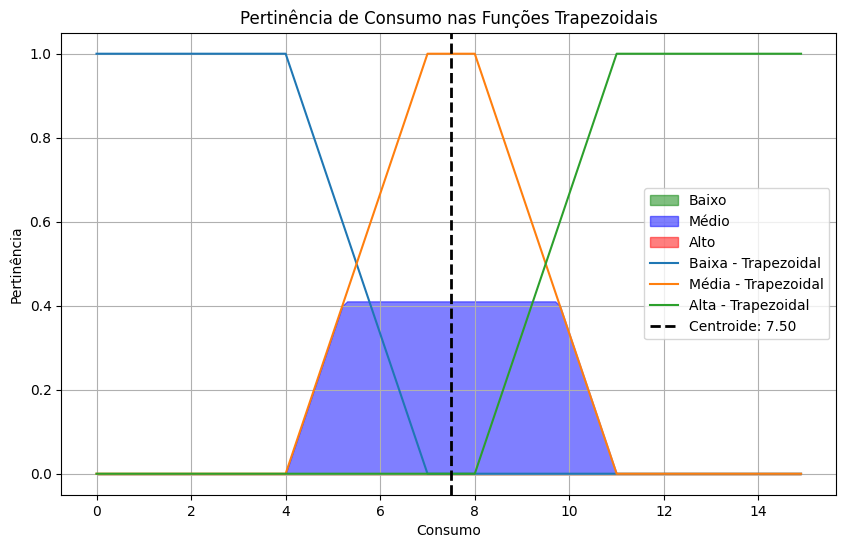

Regra Disparada:  12  - Grau de Disparo:  0.05766509873842125
Regra Disparada:  18  - Grau de Disparo:  0.47116745063078935
Grau de Ativação dos Conjuntos Fuzzy do Consequente:  {1: 0, 2: 0, 3: 0.47116745063078935}
Consumo Final usando o Centróide:  12.5


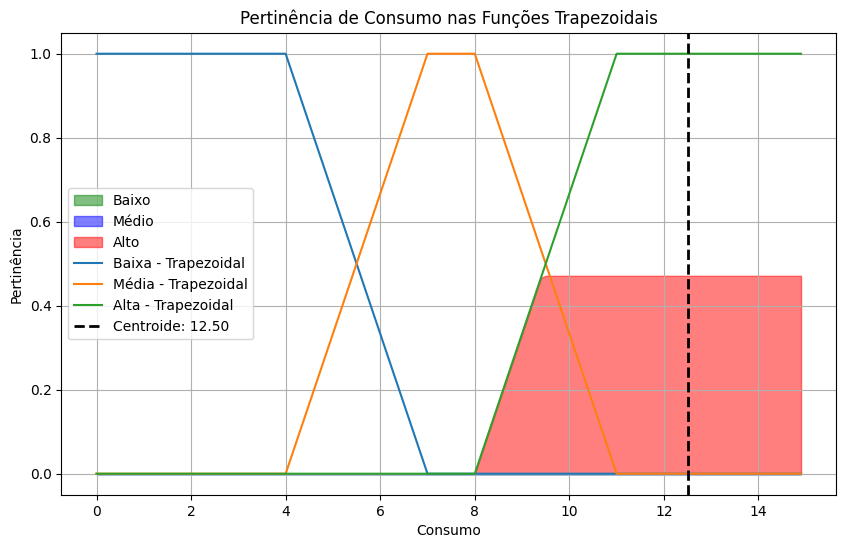

Regra Disparada:  14  - Grau de Disparo:  0.42289525822581736
Regra Disparada:  15  - Grau de Disparo:  0.5580993862938722
Grau de Ativação dos Conjuntos Fuzzy do Consequente:  {1: 0, 2: 0.42289525822581736, 3: 0.5580993862938722}
Consumo Final usando o Centróide:  10.344558782311838


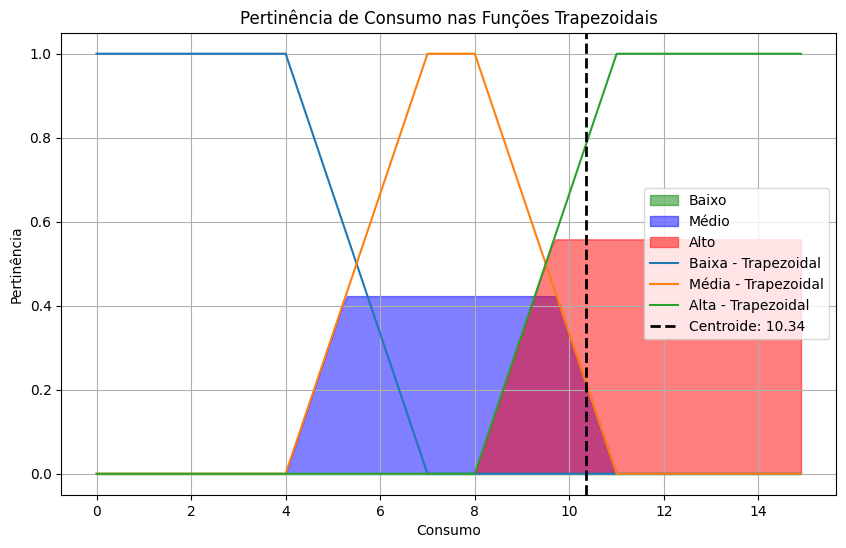

Regra Disparada:  19  - Grau de Disparo:  1
Grau de Ativação dos Conjuntos Fuzzy do Consequente:  {1: 0, 2: 1, 3: 0}
Consumo Final usando o Centróide:  7.5


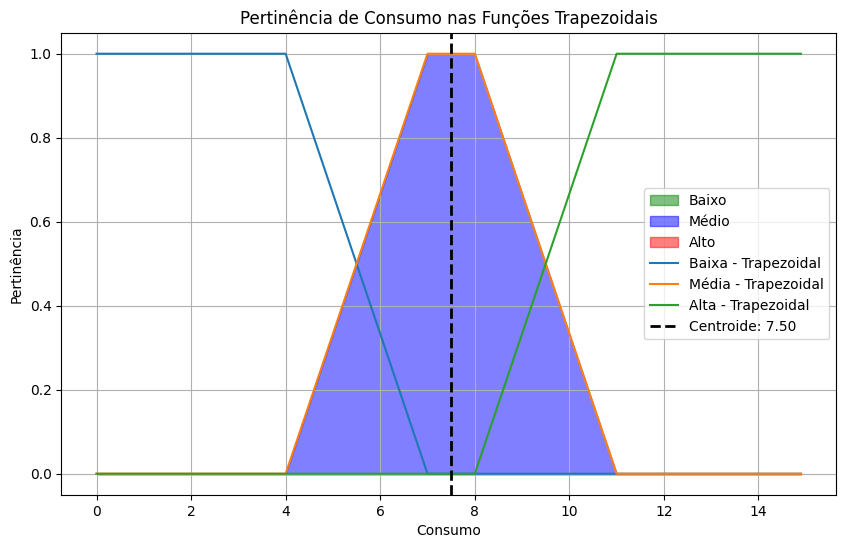

Regra Disparada:  21  - Grau de Disparo:  1
Grau de Ativação dos Conjuntos Fuzzy do Consequente:  {1: 0, 2: 0, 3: 1}
Consumo Final usando o Centróide:  12.5


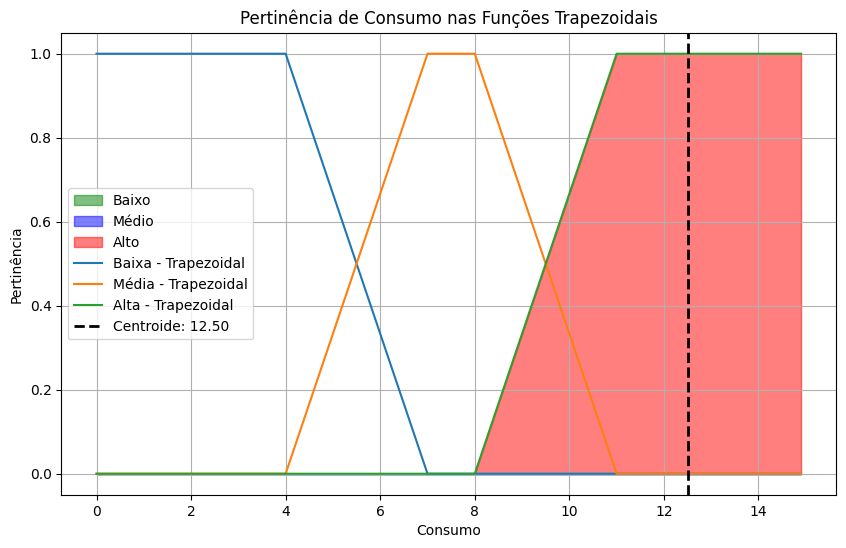

Regra Disparada:  18  - Grau de Disparo:  1
Grau de Ativação dos Conjuntos Fuzzy do Consequente:  {1: 0, 2: 0, 3: 1}
Consumo Final usando o Centróide:  12.5


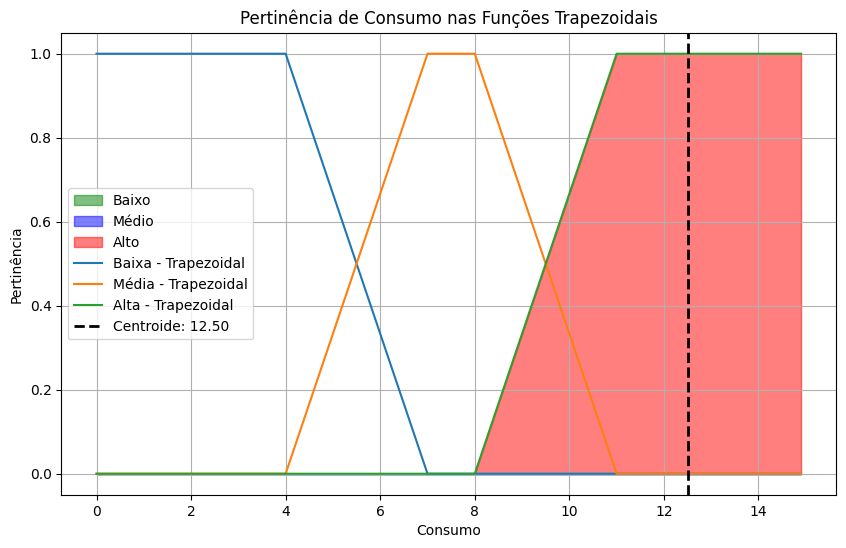

Regra Disparada:  16  - Grau de Disparo:  0.7160712796302828
Grau de Ativação dos Conjuntos Fuzzy do Consequente:  {1: 0, 2: 0.7160712796302828, 3: 0}
Consumo Final usando o Centróide:  7.5


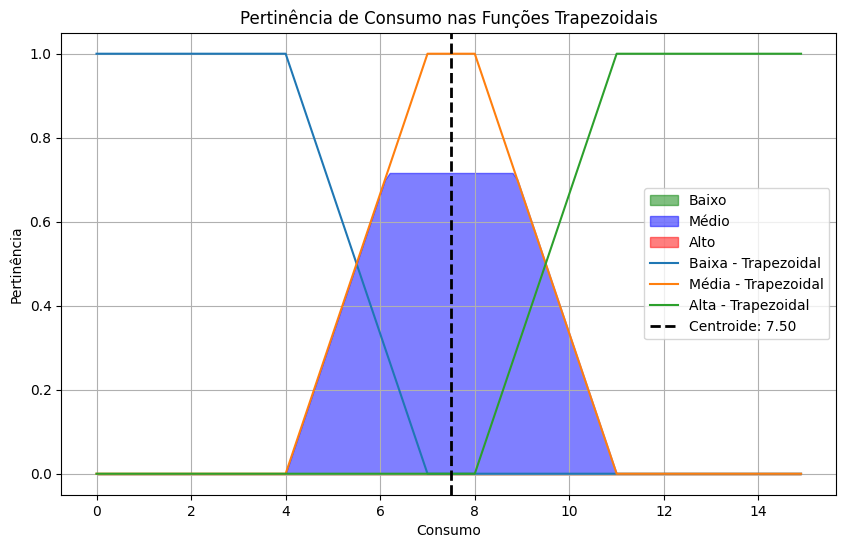

Regra Disparada:  2  - Grau de Disparo:  0.06329669510633984
Regra Disparada:  8  - Grau de Disparo:  0.9367033048936602
Grau de Ativação dos Conjuntos Fuzzy do Consequente:  {1: 0.06329669510633984, 2: 0.9367033048936602, 3: 0}
Consumo Final usando o Centróide:  7.183516524468301


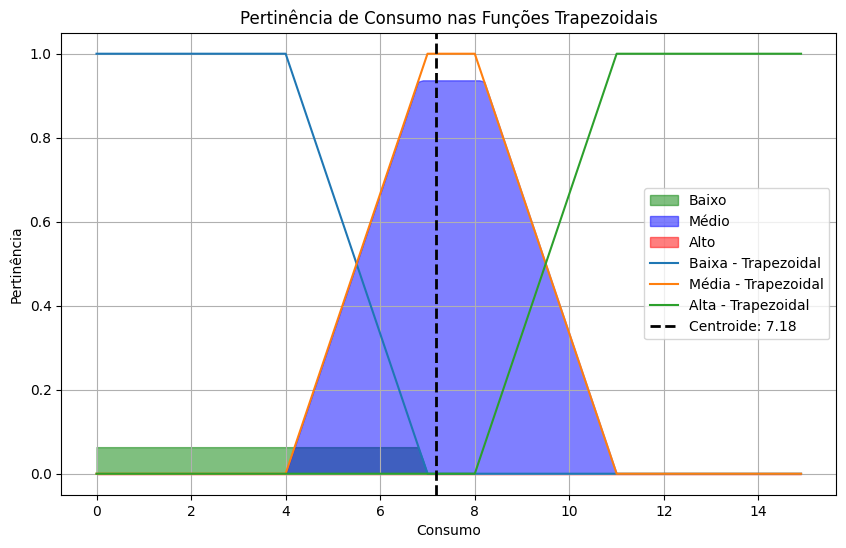

Regra Disparada:  16  - Grau de Disparo:  1
Grau de Ativação dos Conjuntos Fuzzy do Consequente:  {1: 0, 2: 1, 3: 0}
Consumo Final usando o Centróide:  7.5


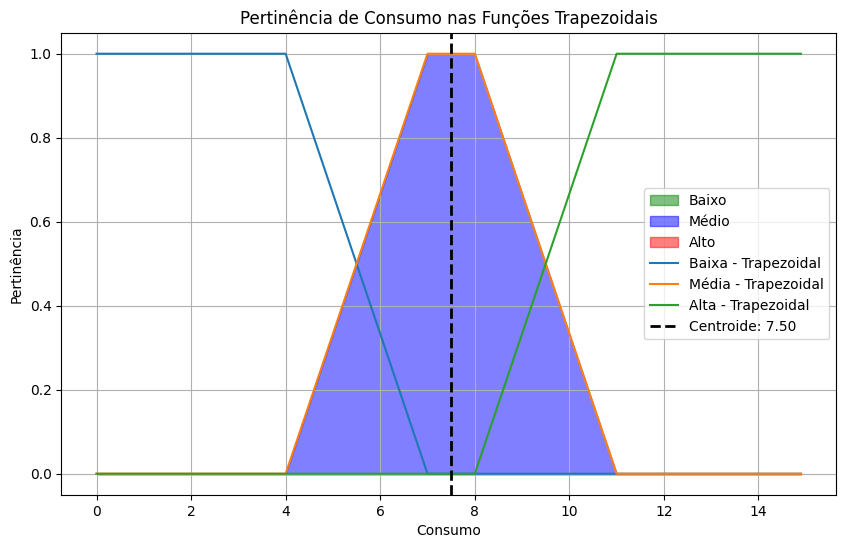

Regra Disparada:  7  - Grau de Disparo:  1
Grau de Ativação dos Conjuntos Fuzzy do Consequente:  {1: 0, 2: 0, 3: 1}
Consumo Final usando o Centróide:  12.5


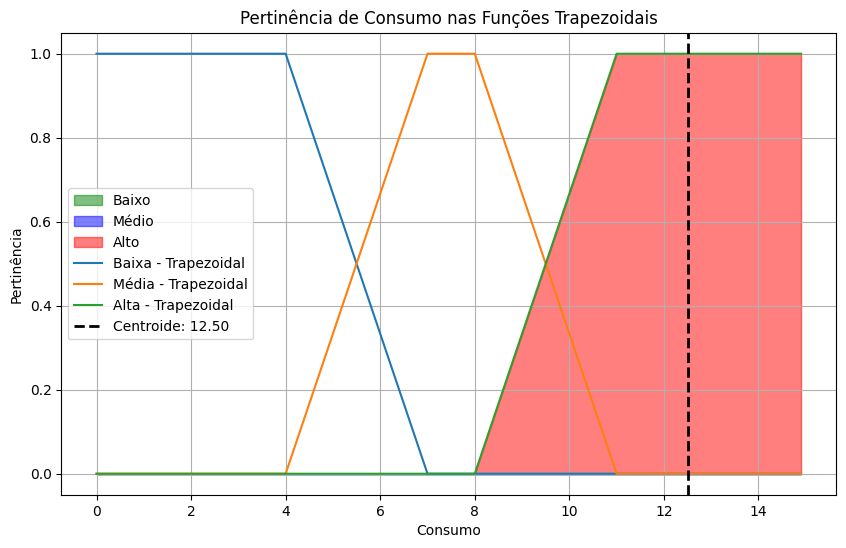

Grau de Ativação dos Conjuntos Fuzzy do Consequente:  {1: 0, 2: 0, 3: 0}


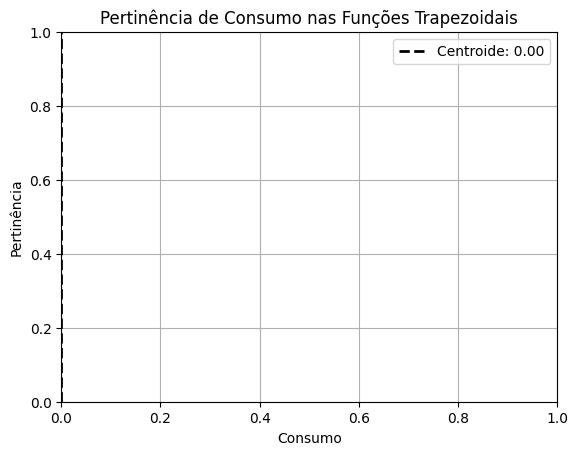

Regra Disparada:  21  - Grau de Disparo:  0.676173176369975
Grau de Ativação dos Conjuntos Fuzzy do Consequente:  {1: 0, 2: 0, 3: 0.676173176369975}
Consumo Final usando o Centróide:  12.5


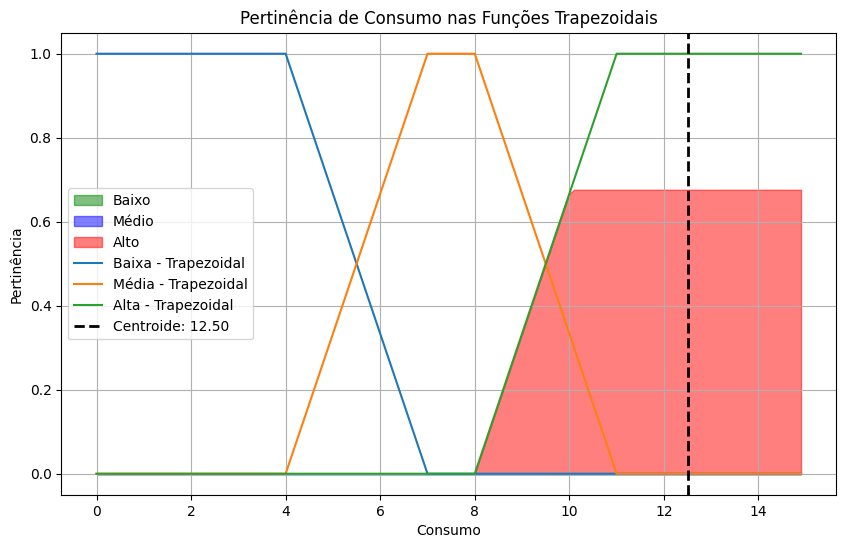

Regra Disparada:  12  - Grau de Disparo:  0.8441210816087164
Regra Disparada:  18  - Grau de Disparo:  0.0779394591956418
Grau de Ativação dos Conjuntos Fuzzy do Consequente:  {1: 0, 2: 0, 3: 0.8441210816087164}
Consumo Final usando o Centróide:  12.5


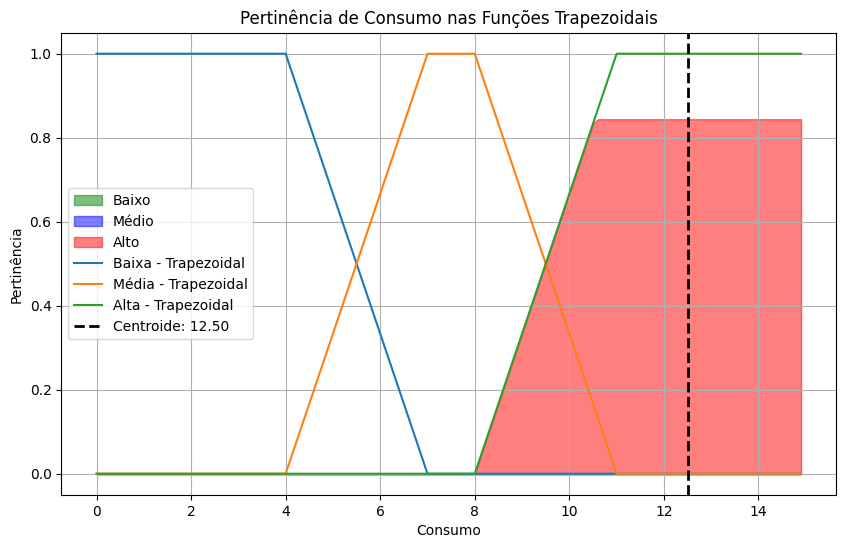

Regra Disparada:  13  - Grau de Disparo:  0.6221386345199917
Grau de Ativação dos Conjuntos Fuzzy do Consequente:  {1: 0.6221386345199917, 2: 0, 3: 0}
Consumo Final usando o Centróide:  2.5


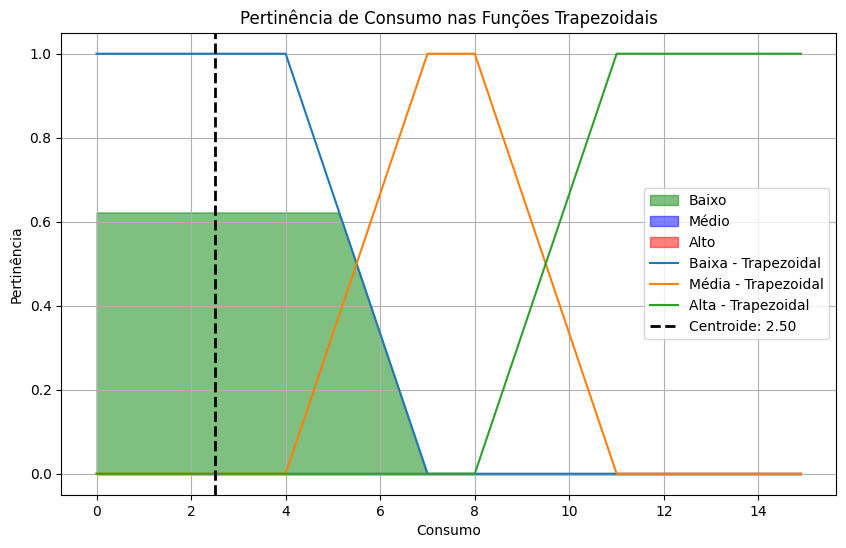

Regra Disparada:  5  - Grau de Disparo:  1
Grau de Ativação dos Conjuntos Fuzzy do Consequente:  {1: 1, 2: 0, 3: 0}
Consumo Final usando o Centróide:  2.5


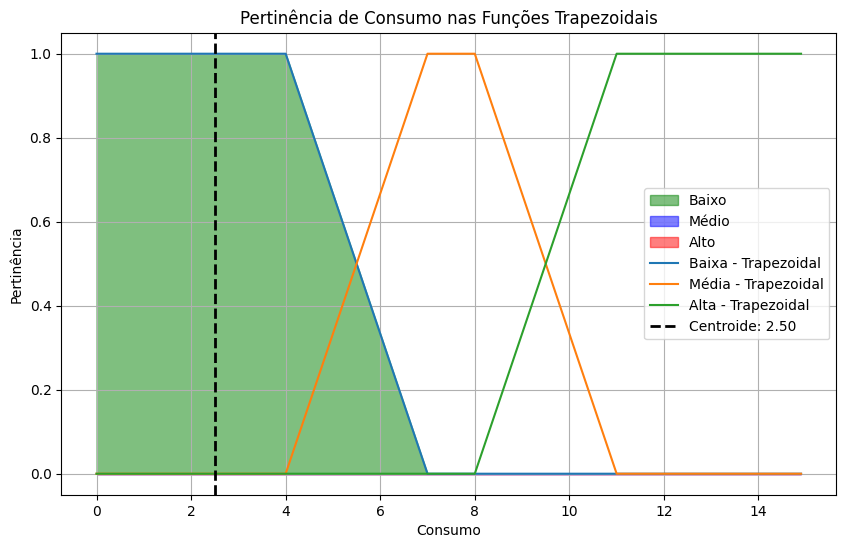

Regra Disparada:  13  - Grau de Disparo:  0.899823248114107
Grau de Ativação dos Conjuntos Fuzzy do Consequente:  {1: 0.899823248114107, 2: 0, 3: 0}
Consumo Final usando o Centróide:  2.5


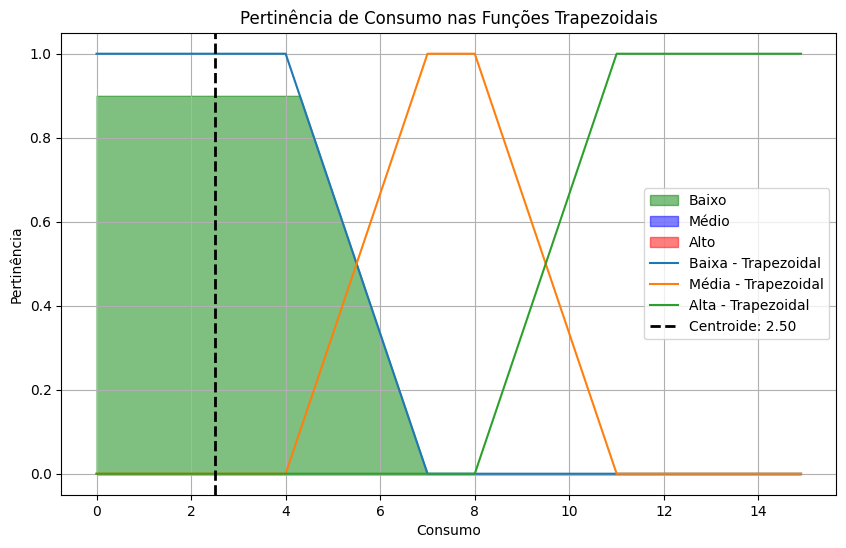

Regra Disparada:  13  - Grau de Disparo:  1
Grau de Ativação dos Conjuntos Fuzzy do Consequente:  {1: 1, 2: 0, 3: 0}
Consumo Final usando o Centróide:  2.5


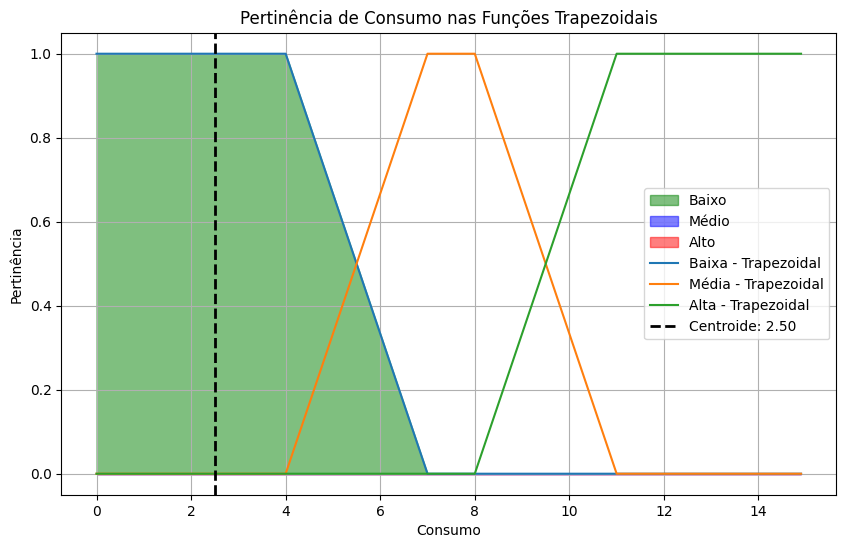

Grau de Ativação dos Conjuntos Fuzzy do Consequente:  {1: 0, 2: 0, 3: 0}


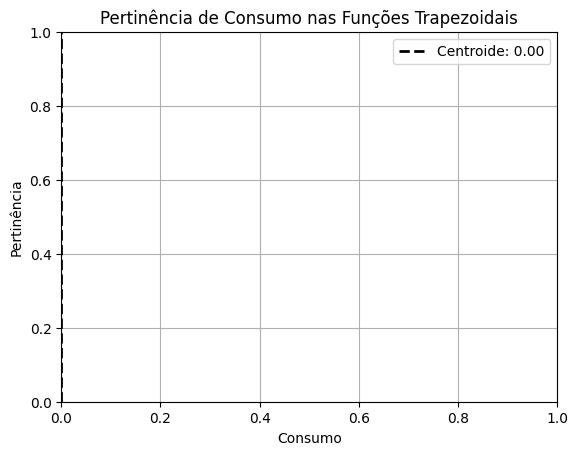

Regra Disparada:  14  - Grau de Disparo:  0.08677072610083485
Regra Disparada:  20  - Grau de Disparo:  0.4566146369495826
Grau de Ativação dos Conjuntos Fuzzy do Consequente:  {1: 0, 2: 0.08677072610083485, 3: 0.4566146369495826}
Consumo Final usando o Centróide:  11.701572843131736


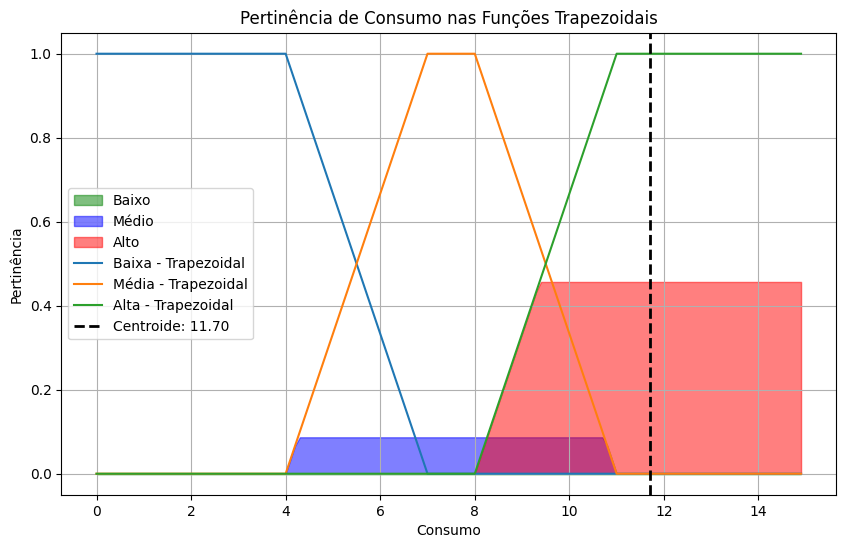

Regra Disparada:  3  - Grau de Disparo:  1
Grau de Ativação dos Conjuntos Fuzzy do Consequente:  {1: 0, 2: 1, 3: 0}
Consumo Final usando o Centróide:  7.5


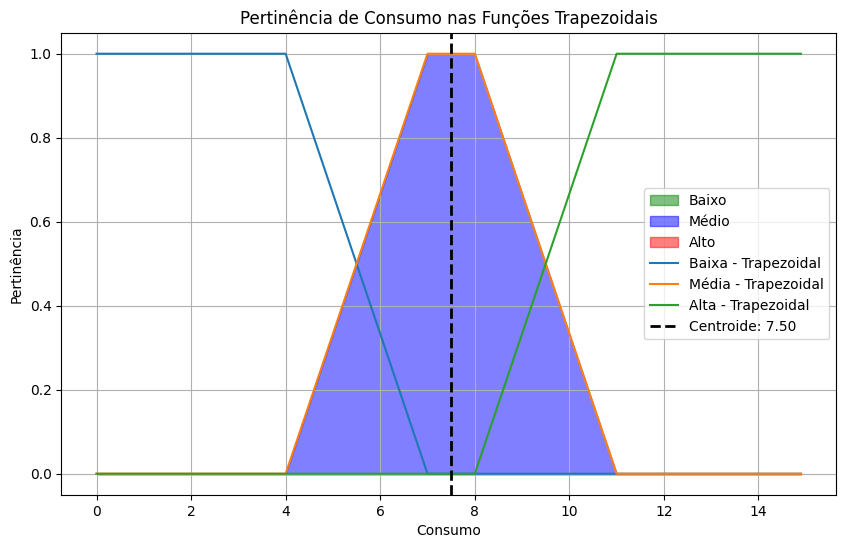

Regra Disparada:  13  - Grau de Disparo:  1
Grau de Ativação dos Conjuntos Fuzzy do Consequente:  {1: 1, 2: 0, 3: 0}
Consumo Final usando o Centróide:  2.5


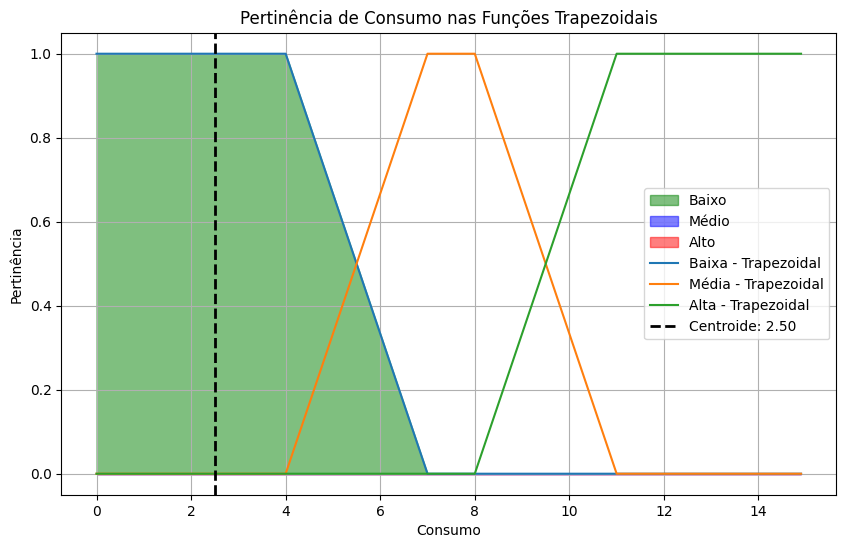

Regra Disparada:  8  - Grau de Disparo:  0.9384215516563479
Grau de Ativação dos Conjuntos Fuzzy do Consequente:  {1: 0, 2: 0.9384215516563479, 3: 0}
Consumo Final usando o Centróide:  7.5


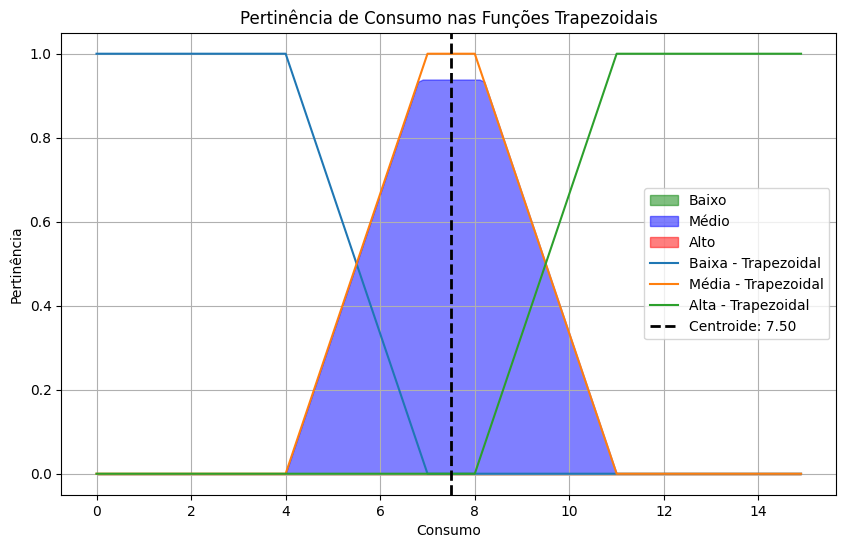

Regra Disparada:  8  - Grau de Disparo:  1
Grau de Ativação dos Conjuntos Fuzzy do Consequente:  {1: 0, 2: 1, 3: 0}
Consumo Final usando o Centróide:  7.5


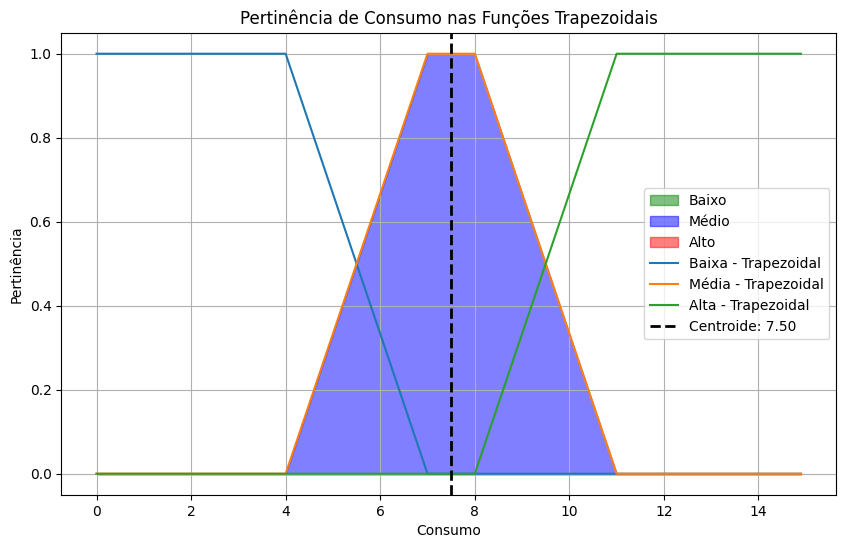

Regra Disparada:  16  - Grau de Disparo:  0.9565606796925377
Grau de Ativação dos Conjuntos Fuzzy do Consequente:  {1: 0, 2: 0.9565606796925377, 3: 0}
Consumo Final usando o Centróide:  7.5


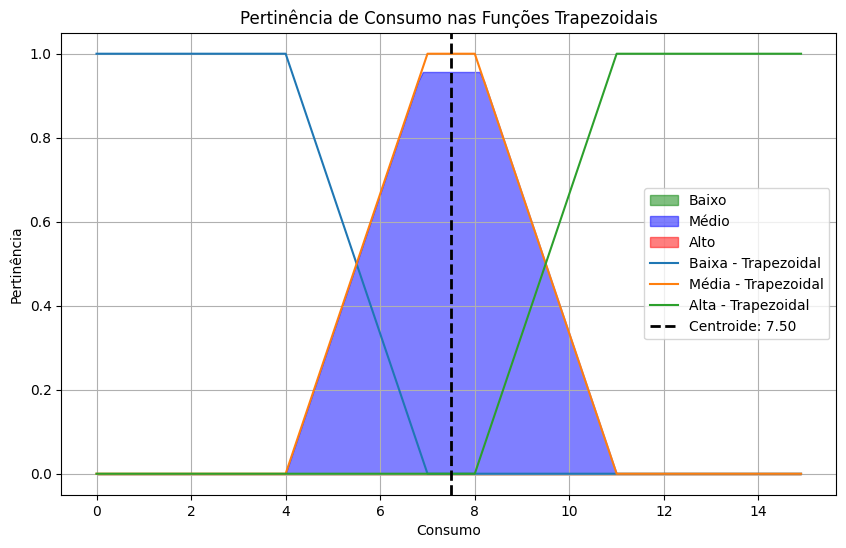

Regra Disparada:  15  - Grau de Disparo:  1
Grau de Ativação dos Conjuntos Fuzzy do Consequente:  {1: 0, 2: 0, 3: 1}
Consumo Final usando o Centróide:  12.5


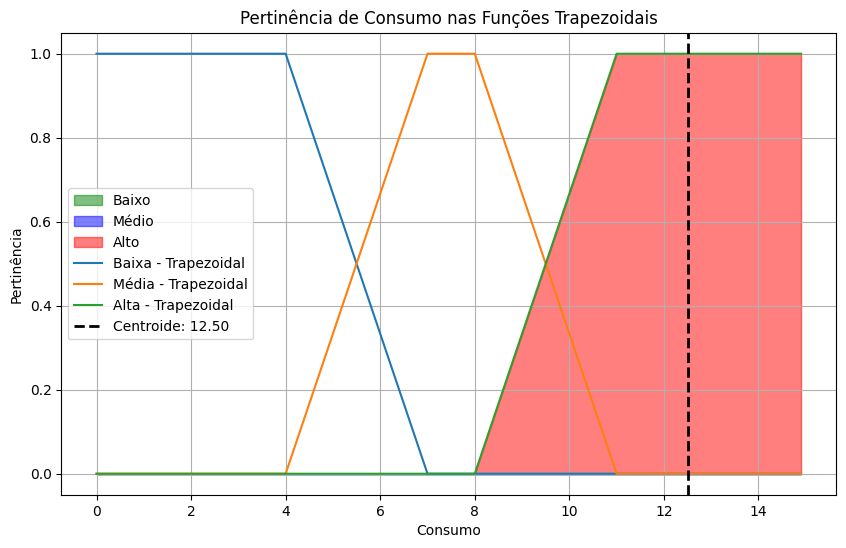

Regra Disparada:  7  - Grau de Disparo:  0.4212529745881852
Grau de Ativação dos Conjuntos Fuzzy do Consequente:  {1: 0, 2: 0, 3: 0.4212529745881852}
Consumo Final usando o Centróide:  12.5


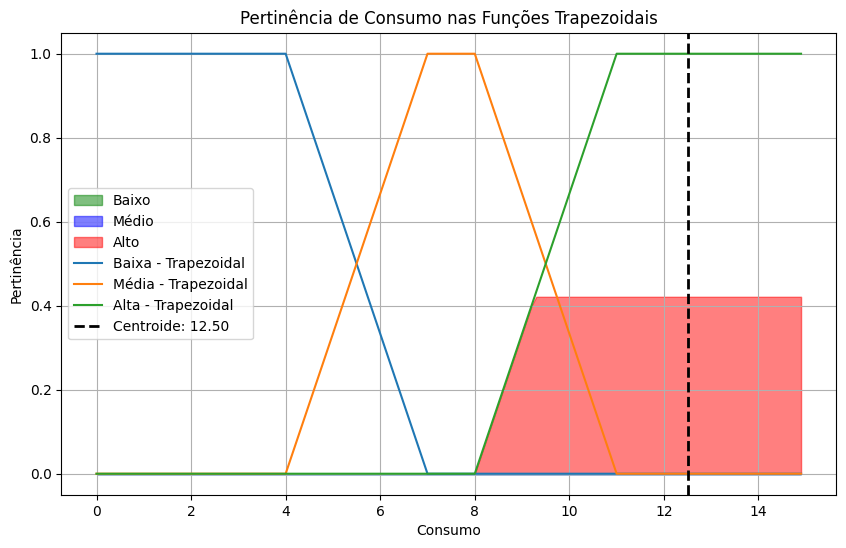

Regra Disparada:  6  - Grau de Disparo:  1
Grau de Ativação dos Conjuntos Fuzzy do Consequente:  {1: 0, 2: 1, 3: 0}
Consumo Final usando o Centróide:  7.5


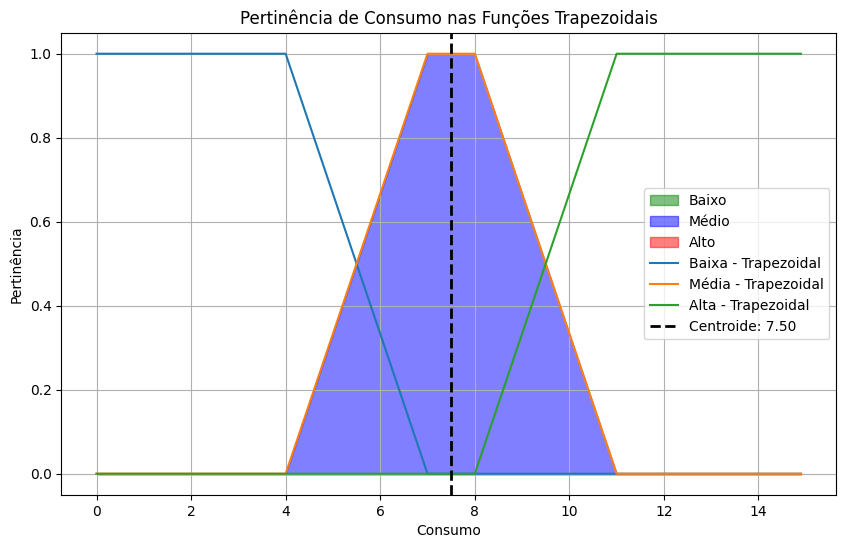

Regra Disparada:  10  - Grau de Disparo:  0.557929683455719
Regra Disparada:  16  - Grau de Disparo:  0.22103515827214046
Grau de Ativação dos Conjuntos Fuzzy do Consequente:  {1: 0.557929683455719, 2: 0.22103515827214046, 3: 0}
Consumo Final usando o Centróide:  3.918774933293855


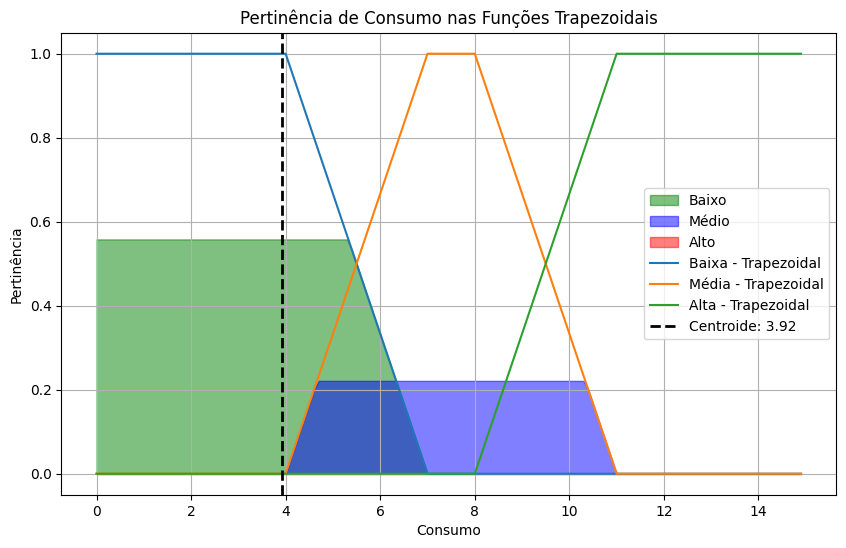

Regra Disparada:  12  - Grau de Disparo:  1
Grau de Ativação dos Conjuntos Fuzzy do Consequente:  {1: 0, 2: 0, 3: 1}
Consumo Final usando o Centróide:  12.5


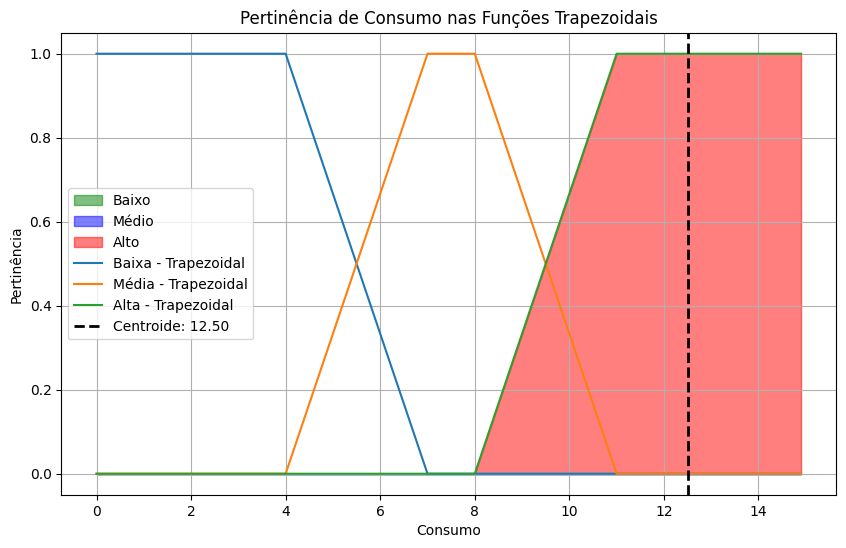

Regra Disparada:  19  - Grau de Disparo:  1
Grau de Ativação dos Conjuntos Fuzzy do Consequente:  {1: 0, 2: 1, 3: 0}
Consumo Final usando o Centróide:  7.5


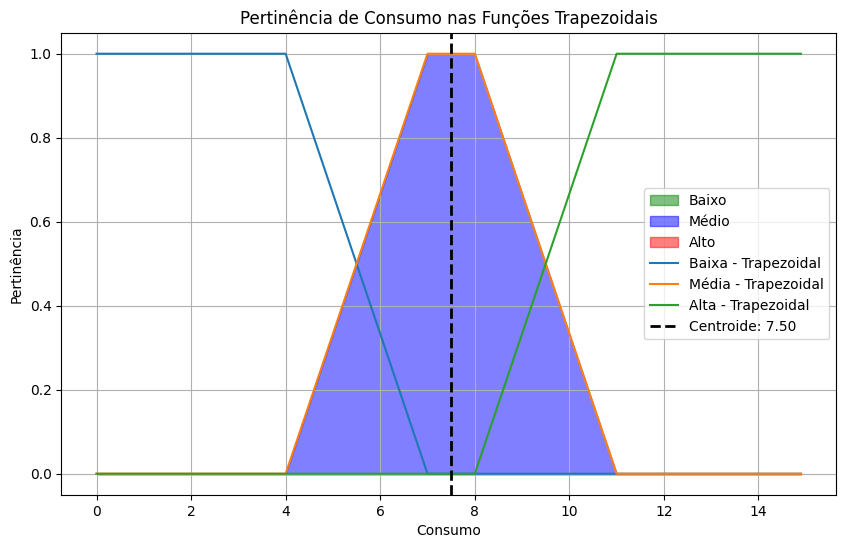

Regra Disparada:  9  - Grau de Disparo:  0.6814809800253293
Grau de Ativação dos Conjuntos Fuzzy do Consequente:  {1: 0.6814809800253293, 2: 0, 3: 0}
Consumo Final usando o Centróide:  2.5


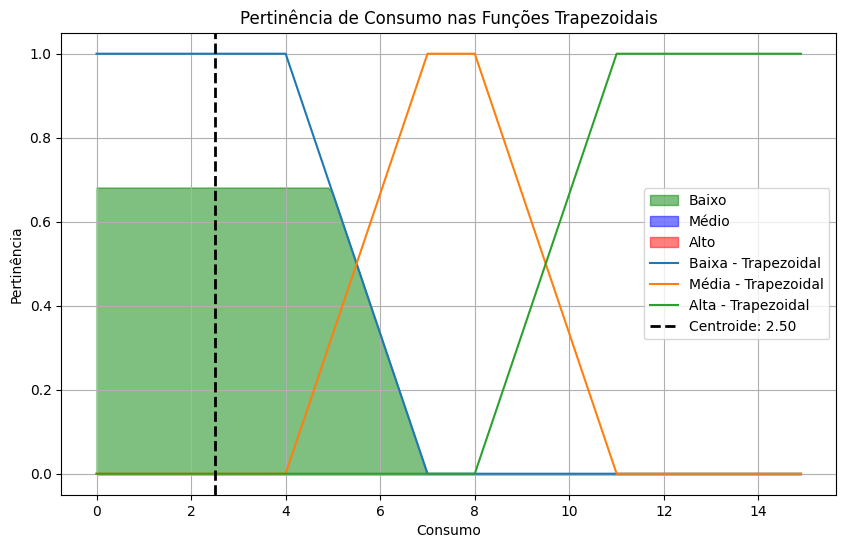

Regra Disparada:  14  - Grau de Disparo:  0.7404071712730375
Grau de Ativação dos Conjuntos Fuzzy do Consequente:  {1: 0, 2: 0.7404071712730375, 3: 0}
Consumo Final usando o Centróide:  7.5


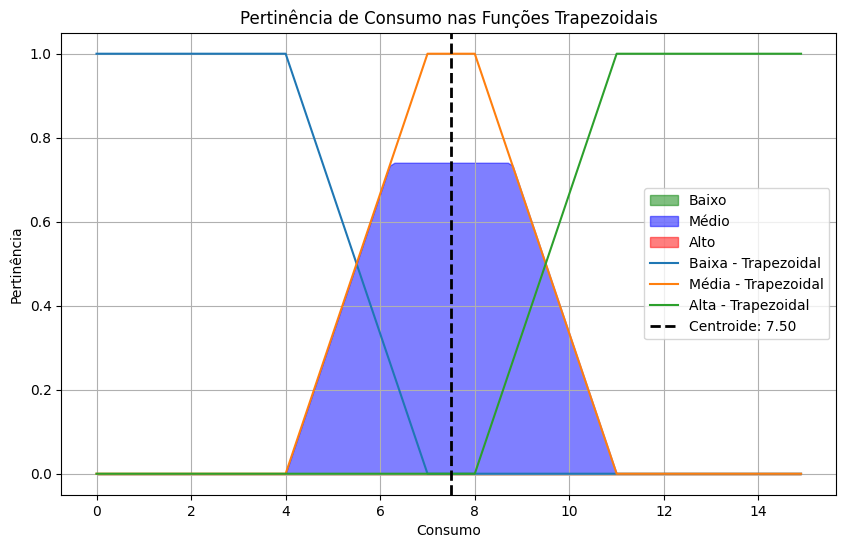

Regra Disparada:  2  - Grau de Disparo:  0.21913033089671644
Regra Disparada:  3  - Grau de Disparo:  0.7808696691032836
Grau de Ativação dos Conjuntos Fuzzy do Consequente:  {1: 0.21913033089671644, 2: 0.7808696691032836, 3: 0}
Consumo Final usando o Centróide:  6.404348345516418


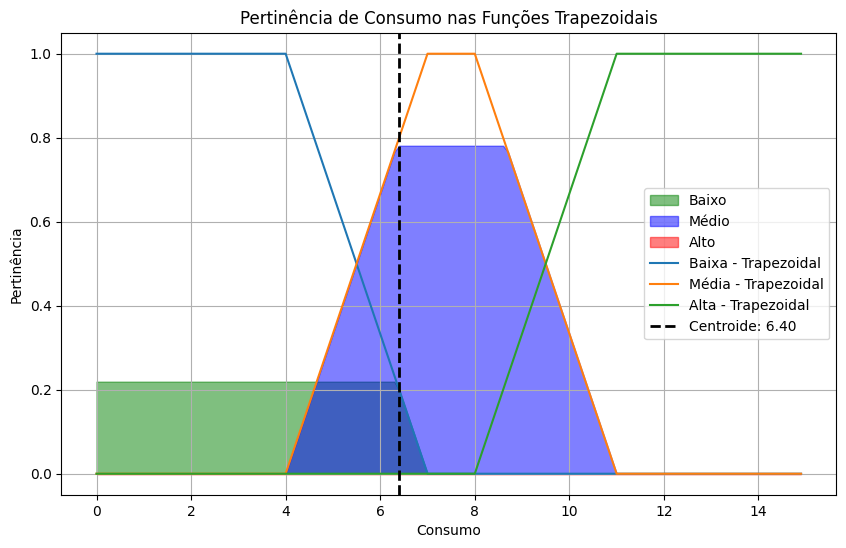

Regra Disparada:  15  - Grau de Disparo:  0.4243956930138573
Regra Disparada:  21  - Grau de Disparo:  0.28780215349307137
Grau de Ativação dos Conjuntos Fuzzy do Consequente:  {1: 0, 2: 0, 3: 0.4243956930138573}
Consumo Final usando o Centróide:  12.5


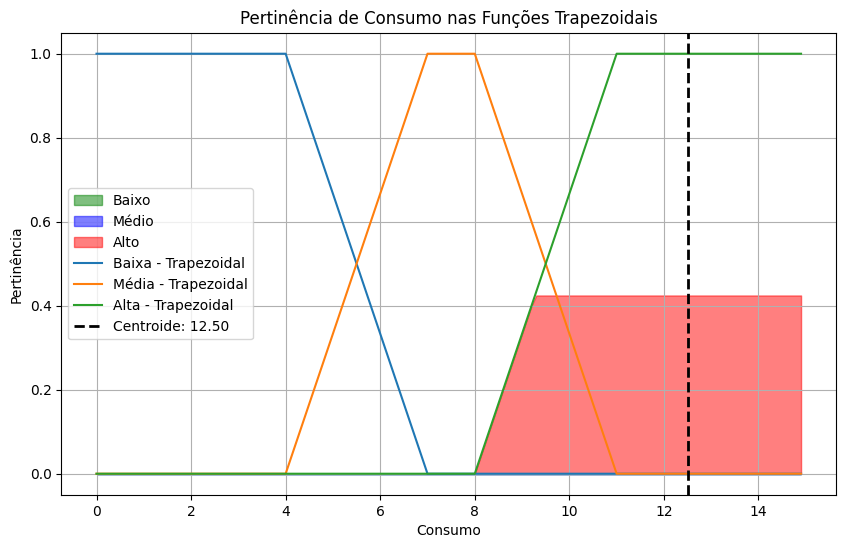

Grau de Ativação dos Conjuntos Fuzzy do Consequente:  {1: 0, 2: 0, 3: 0}


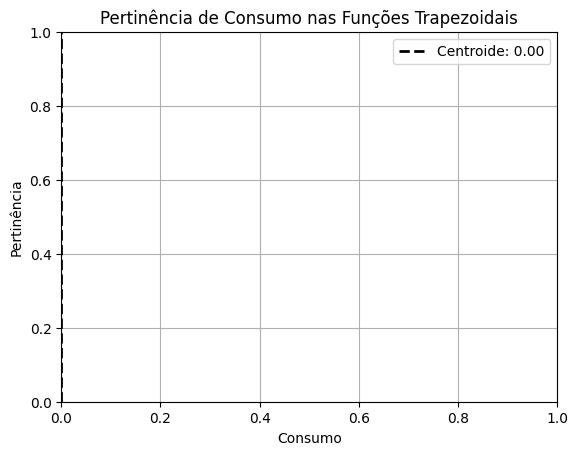

Regra Disparada:  1  - Grau de Disparo:  1
Grau de Ativação dos Conjuntos Fuzzy do Consequente:  {1: 1, 2: 0, 3: 0}
Consumo Final usando o Centróide:  2.5


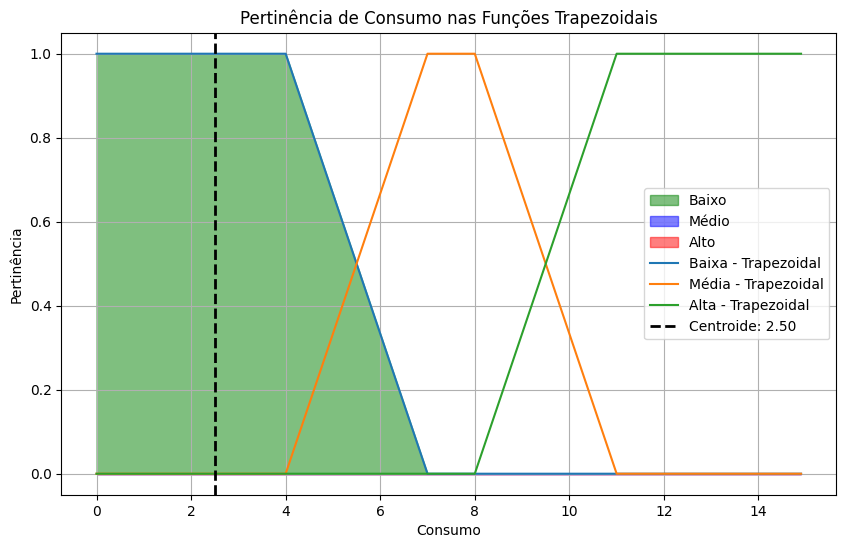

Regra Disparada:  3  - Grau de Disparo:  1
Grau de Ativação dos Conjuntos Fuzzy do Consequente:  {1: 0, 2: 1, 3: 0}
Consumo Final usando o Centróide:  7.5


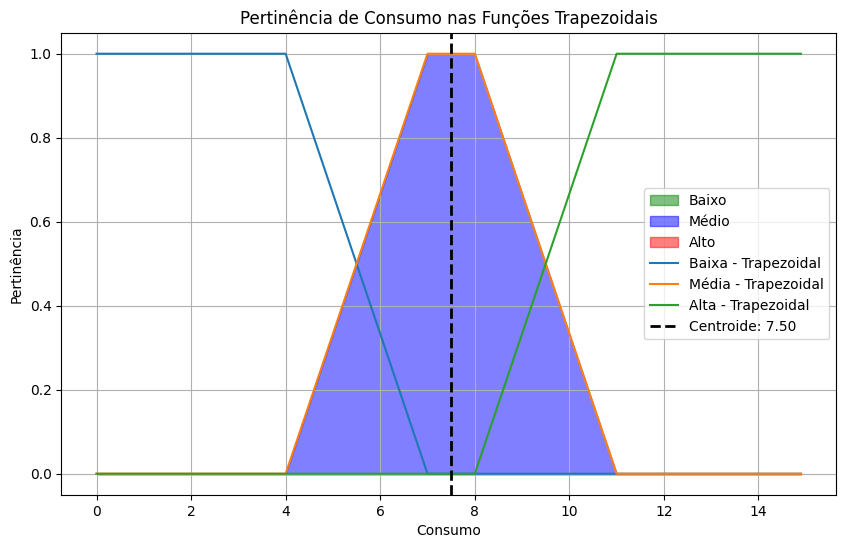

Regra Disparada:  17  - Grau de Disparo:  1
Grau de Ativação dos Conjuntos Fuzzy do Consequente:  {1: 0, 2: 0, 3: 1}
Consumo Final usando o Centróide:  12.5


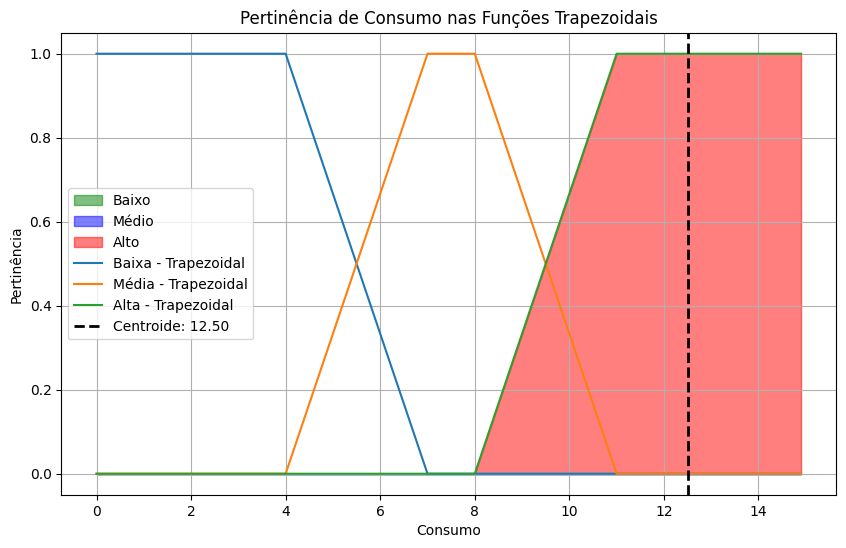

Grau de Ativação dos Conjuntos Fuzzy do Consequente:  {1: 0, 2: 0, 3: 0}


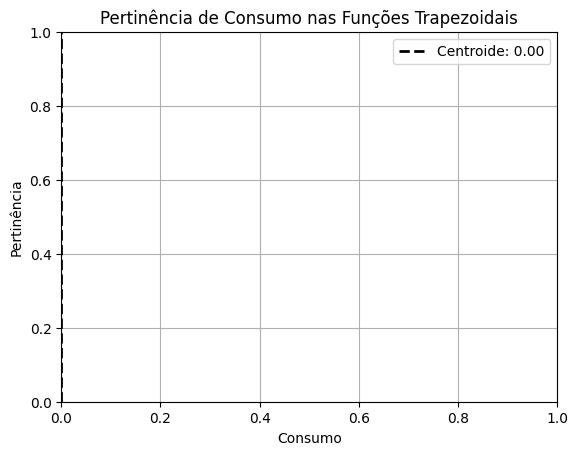

Regra Disparada:  12  - Grau de Disparo:  1
Grau de Ativação dos Conjuntos Fuzzy do Consequente:  {1: 0, 2: 0, 3: 1}
Consumo Final usando o Centróide:  12.5


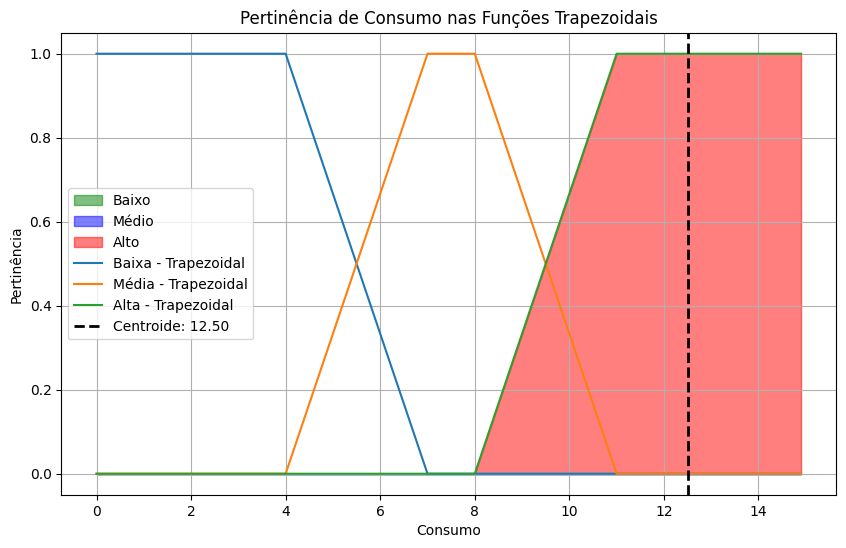

Regra Disparada:  8  - Grau de Disparo:  0.9133210941823418
Grau de Ativação dos Conjuntos Fuzzy do Consequente:  {1: 0, 2: 0.9133210941823418, 3: 0}
Consumo Final usando o Centróide:  7.5


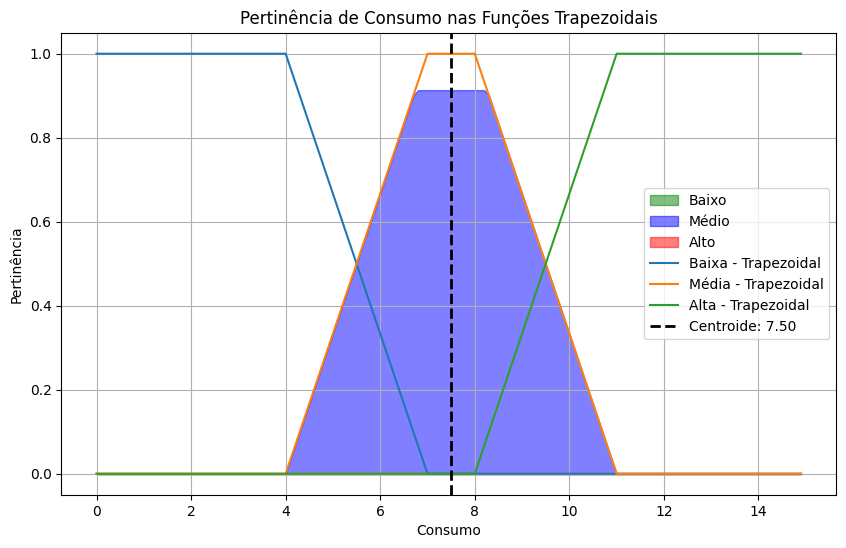

Regra Disparada:  16  - Grau de Disparo:  0.8793773745370611
Grau de Ativação dos Conjuntos Fuzzy do Consequente:  {1: 0, 2: 0.8793773745370611, 3: 0}
Consumo Final usando o Centróide:  7.5


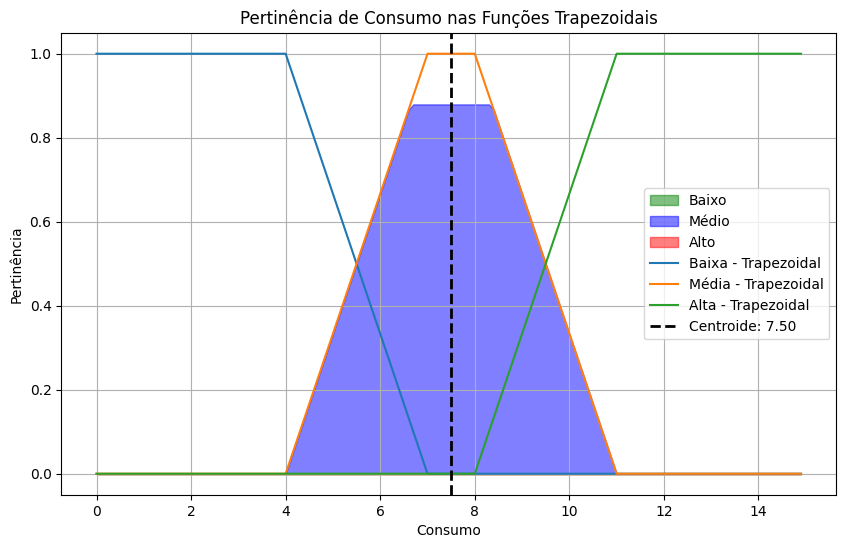

Regra Disparada:  3  - Grau de Disparo:  0.8307151874541996
Regra Disparada:  7  - Grau de Disparo:  0.16928481254580047
Grau de Ativação dos Conjuntos Fuzzy do Consequente:  {1: 0, 2: 0.8307151874541996, 3: 0.16928481254580047}
Consumo Final usando o Centróide:  8.346424062729003


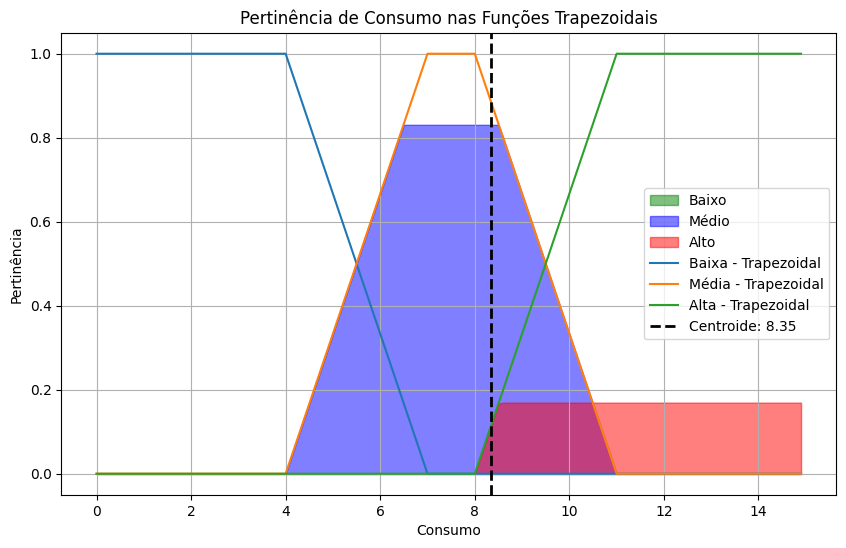

Regra Disparada:  5  - Grau de Disparo:  0.36458328421951125
Regra Disparada:  11  - Grau de Disparo:  0.6354167157804888
Grau de Ativação dos Conjuntos Fuzzy do Consequente:  {1: 0.36458328421951125, 2: 0.6354167157804888, 3: 0}
Consumo Final usando o Centróide:  5.677083578902444


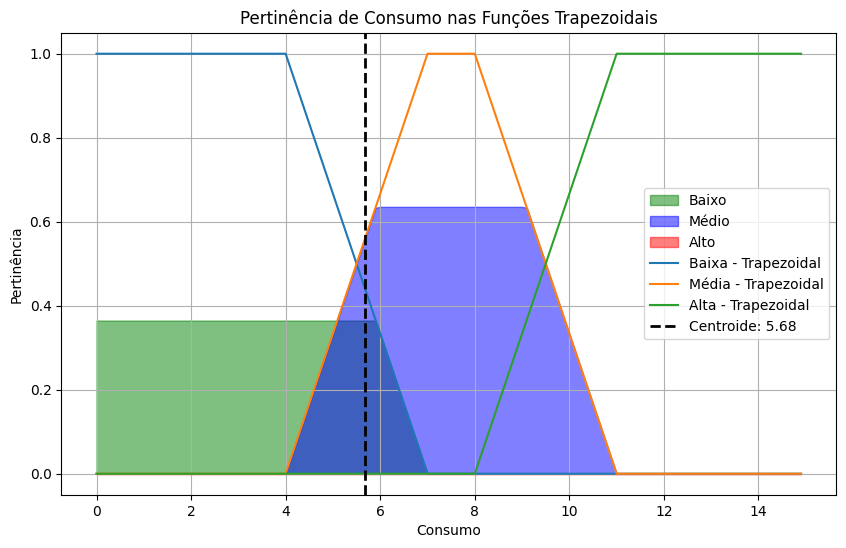

Regra Disparada:  6  - Grau de Disparo:  1
Grau de Ativação dos Conjuntos Fuzzy do Consequente:  {1: 0, 2: 1, 3: 0}
Consumo Final usando o Centróide:  7.5


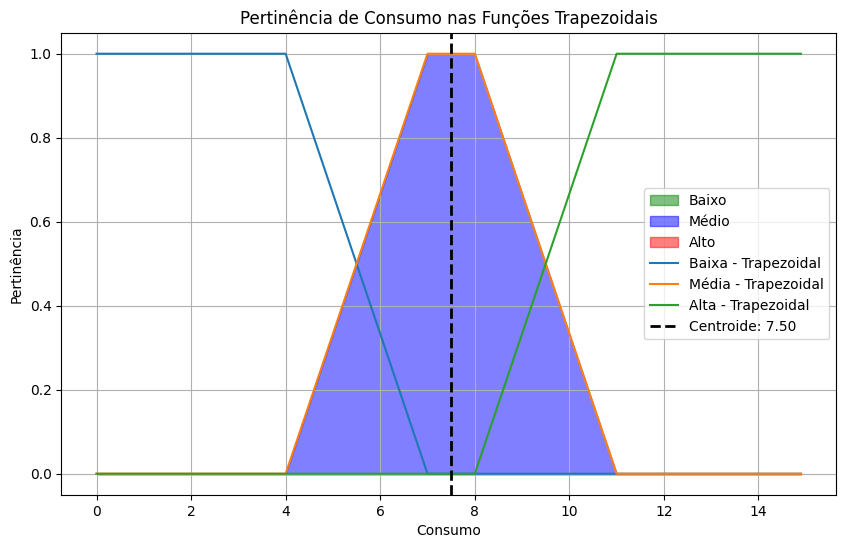

Regra Disparada:  16  - Grau de Disparo:  1
Grau de Ativação dos Conjuntos Fuzzy do Consequente:  {1: 0, 2: 1, 3: 0}
Consumo Final usando o Centróide:  7.5


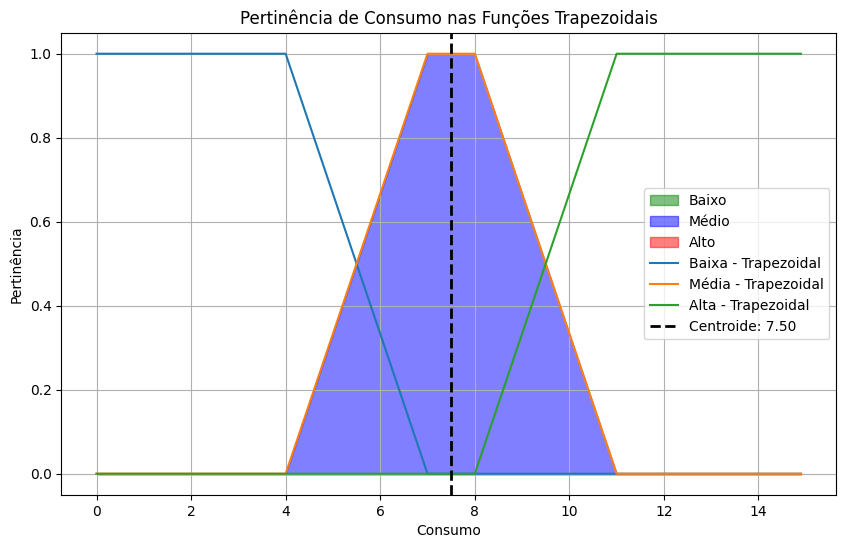

Regra Disparada:  13  - Grau de Disparo:  0.03398658020043044
Grau de Ativação dos Conjuntos Fuzzy do Consequente:  {1: 0.03398658020043044, 2: 0, 3: 0}
Consumo Final usando o Centróide:  2.5


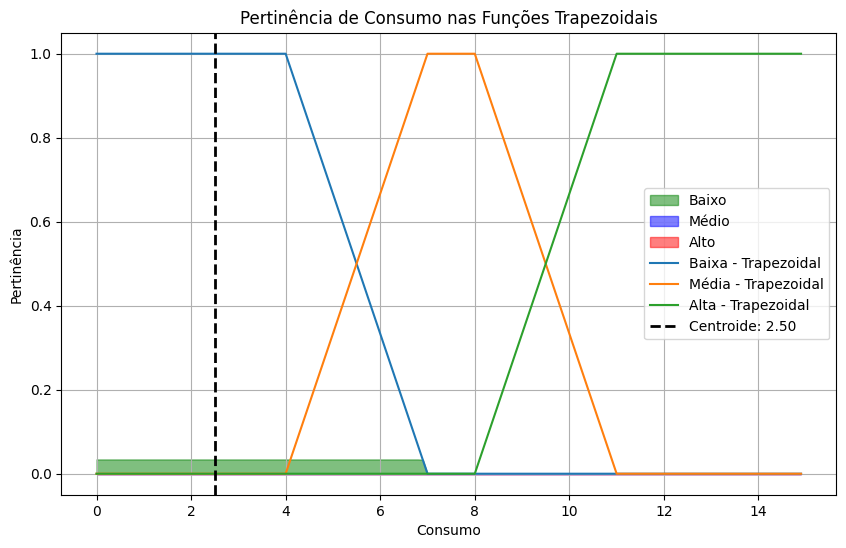

Grau de Ativação dos Conjuntos Fuzzy do Consequente:  {1: 0, 2: 0, 3: 0}


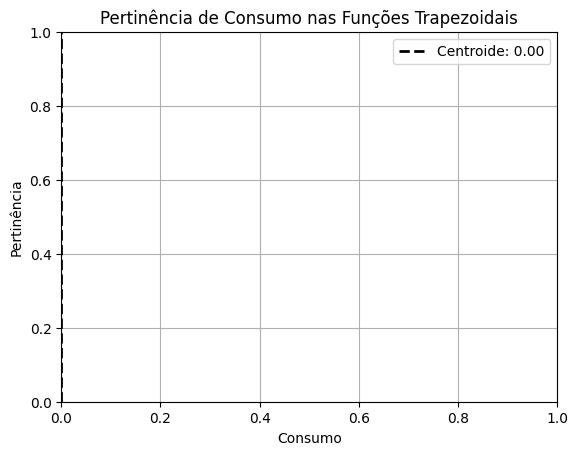

Grau de Ativação dos Conjuntos Fuzzy do Consequente:  {1: 0, 2: 0, 3: 0}


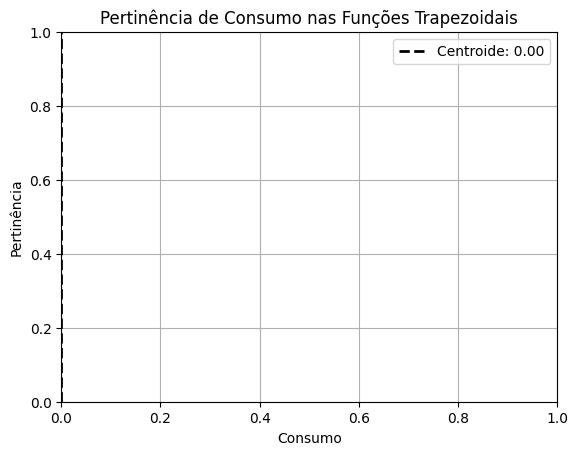

Regra Disparada:  1  - Grau de Disparo:  0.44898917797571886
Regra Disparada:  9  - Grau de Disparo:  0.5510108220242811
Grau de Ativação dos Conjuntos Fuzzy do Consequente:  {1: 0.5510108220242811, 2: 0, 3: 0}
Consumo Final usando o Centróide:  2.5


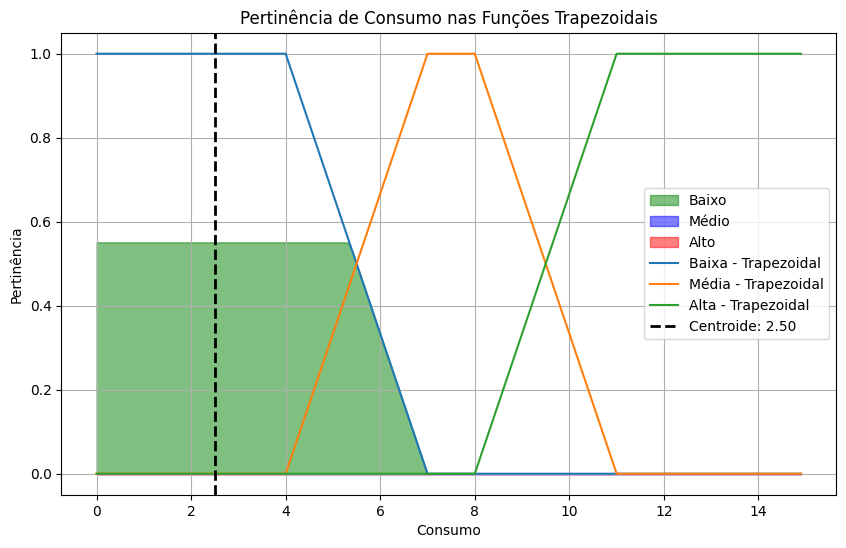

Grau de Ativação dos Conjuntos Fuzzy do Consequente:  {1: 0, 2: 0, 3: 0}


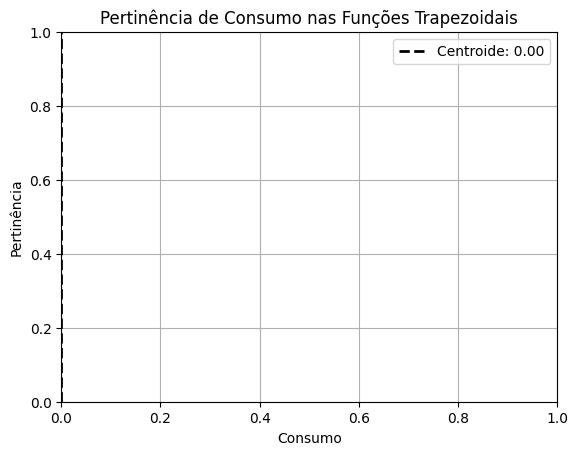

Regra Disparada:  7  - Grau de Disparo:  0.3315771092269969
Regra Disparada:  8  - Grau de Disparo:  0.6684228907730031
Grau de Ativação dos Conjuntos Fuzzy do Consequente:  {1: 0, 2: 0.6684228907730031, 3: 0.3315771092269969}
Consumo Final usando o Centróide:  9.157885546134985


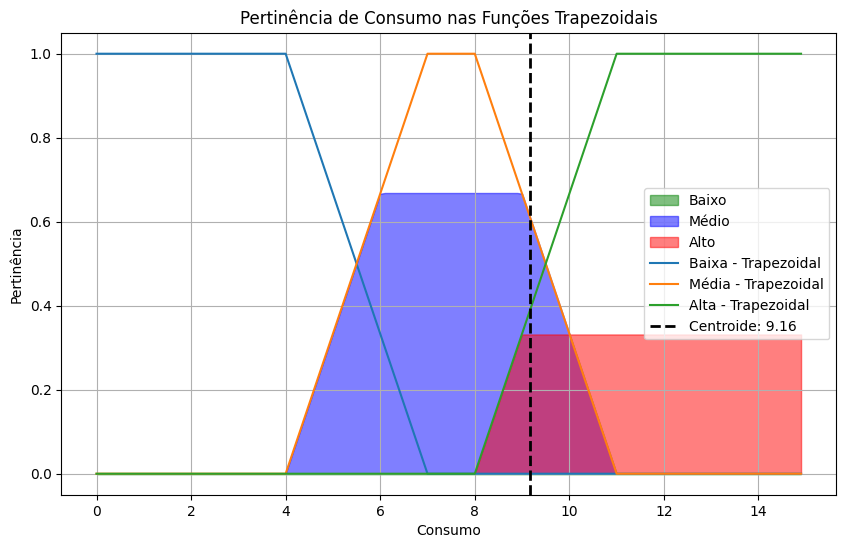

Regra Disparada:  21  - Grau de Disparo:  0.882551982373338
Grau de Ativação dos Conjuntos Fuzzy do Consequente:  {1: 0, 2: 0, 3: 0.882551982373338}
Consumo Final usando o Centróide:  12.5


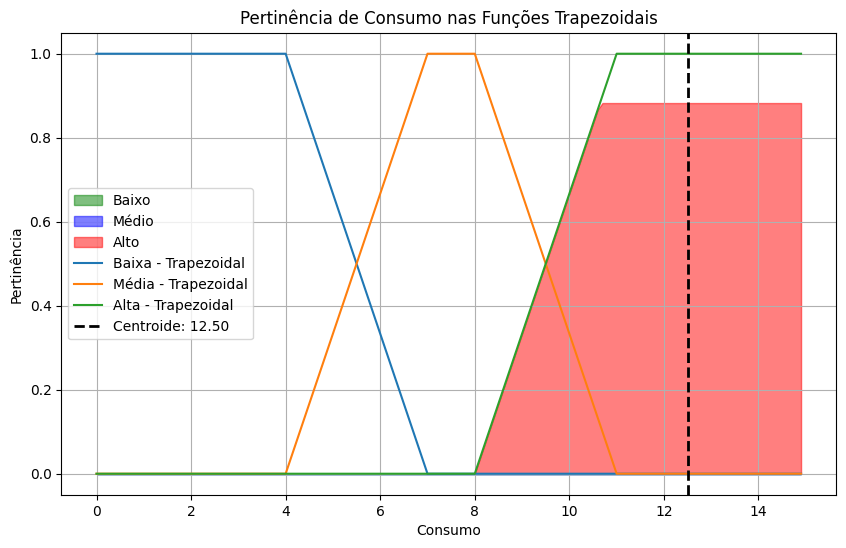

Regra Disparada:  14  - Grau de Disparo:  1
Grau de Ativação dos Conjuntos Fuzzy do Consequente:  {1: 0, 2: 1, 3: 0}
Consumo Final usando o Centróide:  7.5


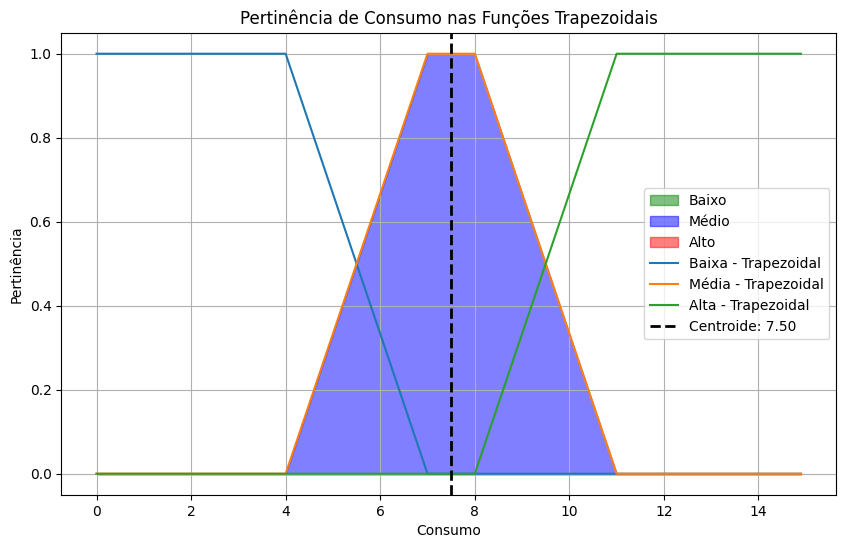

Regra Disparada:  19  - Grau de Disparo:  1
Grau de Ativação dos Conjuntos Fuzzy do Consequente:  {1: 0, 2: 1, 3: 0}
Consumo Final usando o Centróide:  7.5


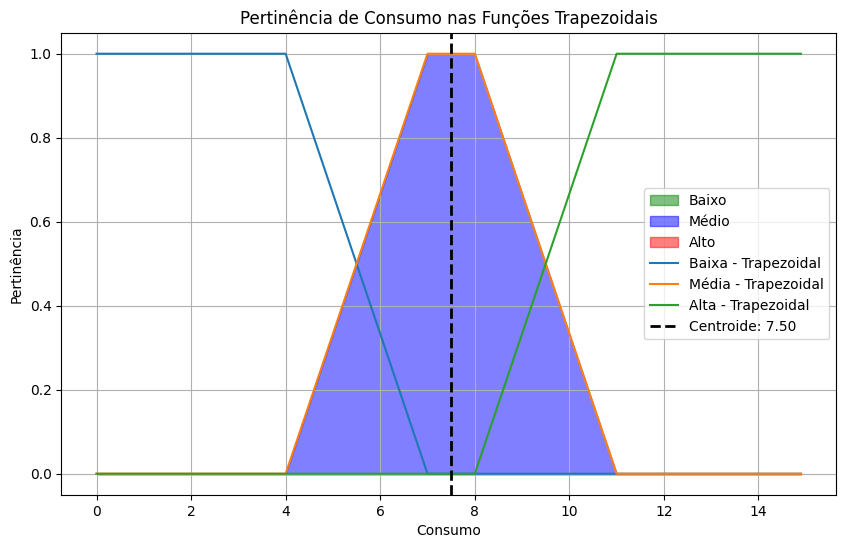

Regra Disparada:  16  - Grau de Disparo:  1
Grau de Ativação dos Conjuntos Fuzzy do Consequente:  {1: 0, 2: 1, 3: 0}
Consumo Final usando o Centróide:  7.5


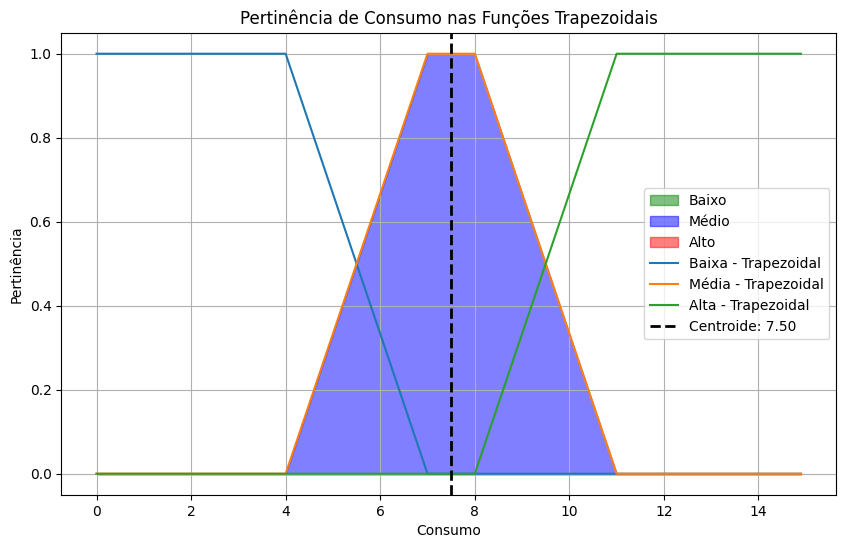

Regra Disparada:  18  - Grau de Disparo:  0.9836903775342108
Grau de Ativação dos Conjuntos Fuzzy do Consequente:  {1: 0, 2: 0, 3: 0.9836903775342108}
Consumo Final usando o Centróide:  12.5


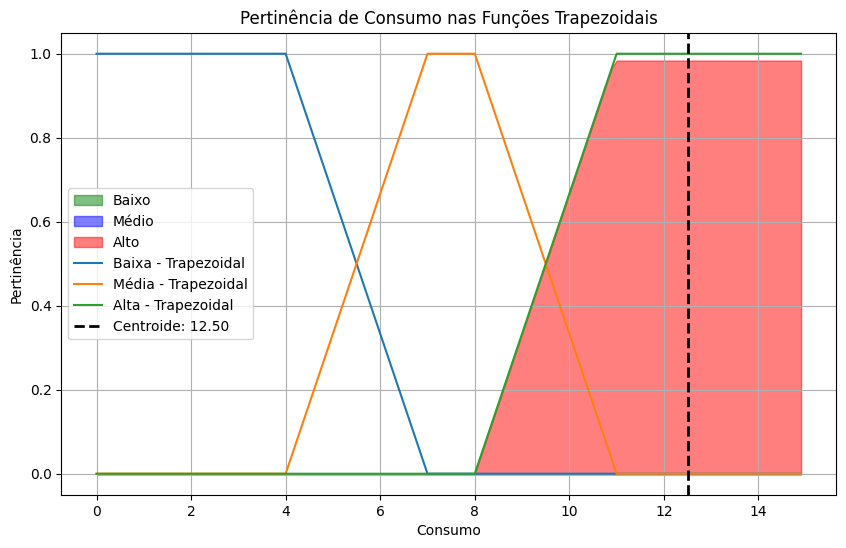

Regra Disparada:  1  - Grau de Disparo:  0.19850783790331014
Regra Disparada:  9  - Grau de Disparo:  0.8014921620966898
Grau de Ativação dos Conjuntos Fuzzy do Consequente:  {1: 0.8014921620966898, 2: 0, 3: 0}
Consumo Final usando o Centróide:  2.5


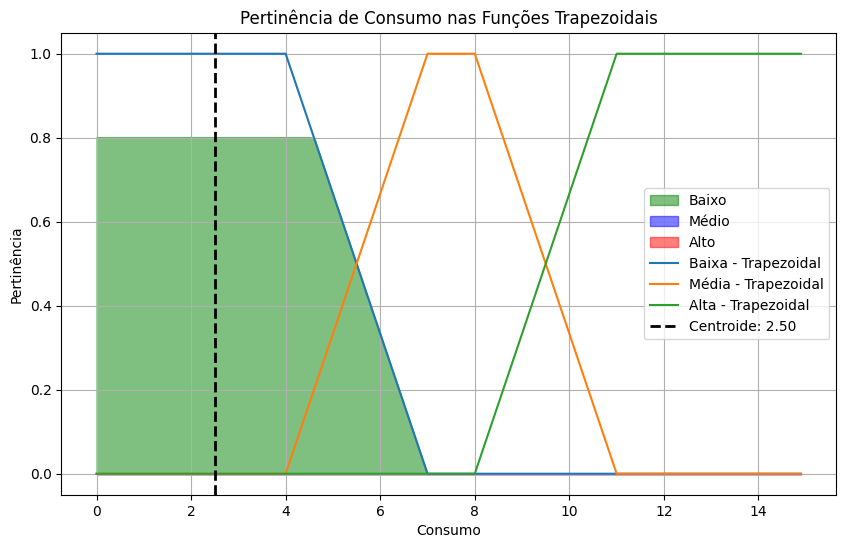

Regra Disparada:  3  - Grau de Disparo:  1
Grau de Ativação dos Conjuntos Fuzzy do Consequente:  {1: 0, 2: 1, 3: 0}
Consumo Final usando o Centróide:  7.5


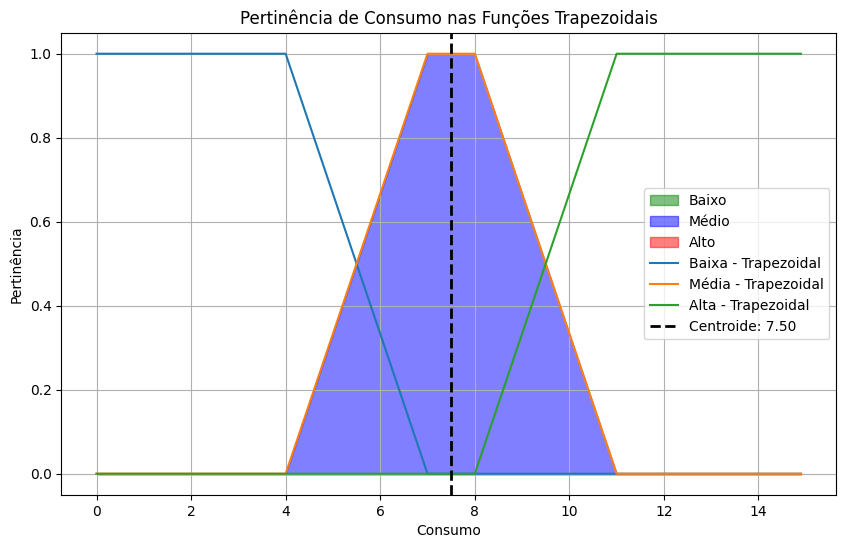

Regra Disparada:  17  - Grau de Disparo:  1
Grau de Ativação dos Conjuntos Fuzzy do Consequente:  {1: 0, 2: 0, 3: 1}
Consumo Final usando o Centróide:  12.5


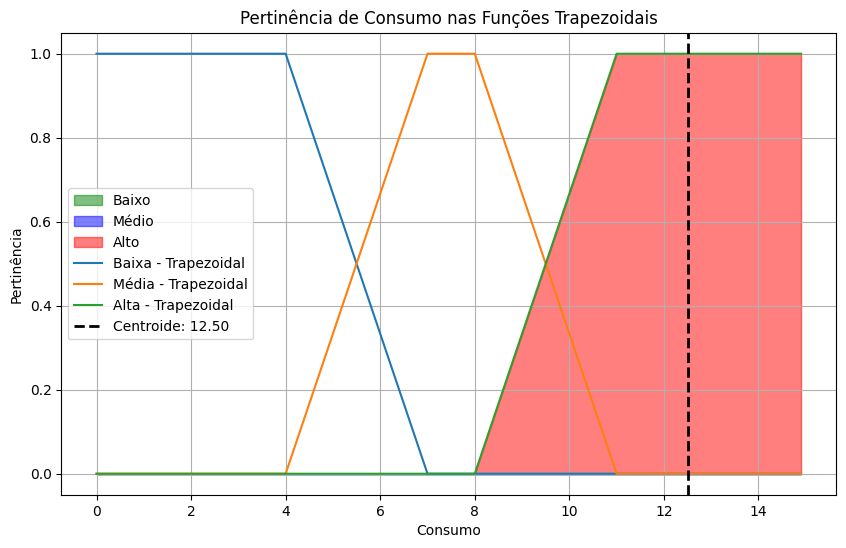

Regra Disparada:  8  - Grau de Disparo:  0.4003303867623259
Grau de Ativação dos Conjuntos Fuzzy do Consequente:  {1: 0, 2: 0.4003303867623259, 3: 0}
Consumo Final usando o Centróide:  7.5


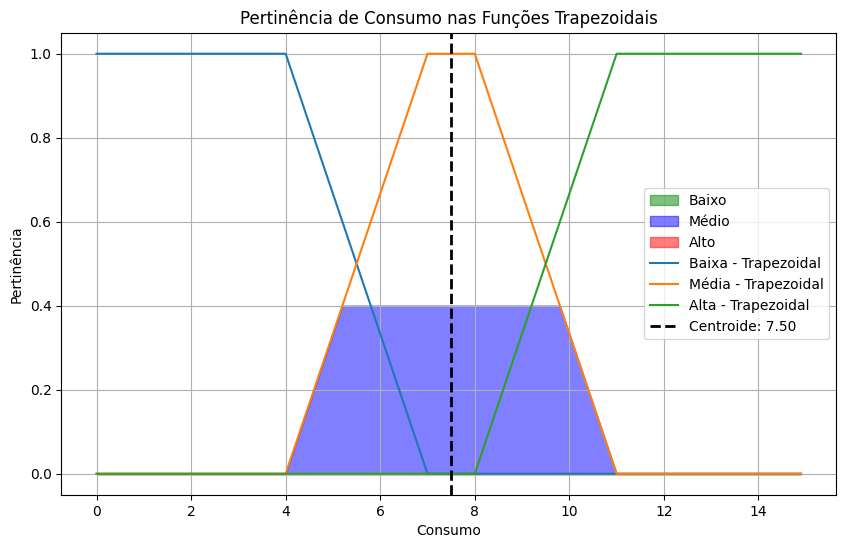

Regra Disparada:  15  - Grau de Disparo:  0.07367058599034806
Regra Disparada:  21  - Grau de Disparo:  0.463164707004826
Grau de Ativação dos Conjuntos Fuzzy do Consequente:  {1: 0, 2: 0, 3: 0.463164707004826}
Consumo Final usando o Centróide:  12.5


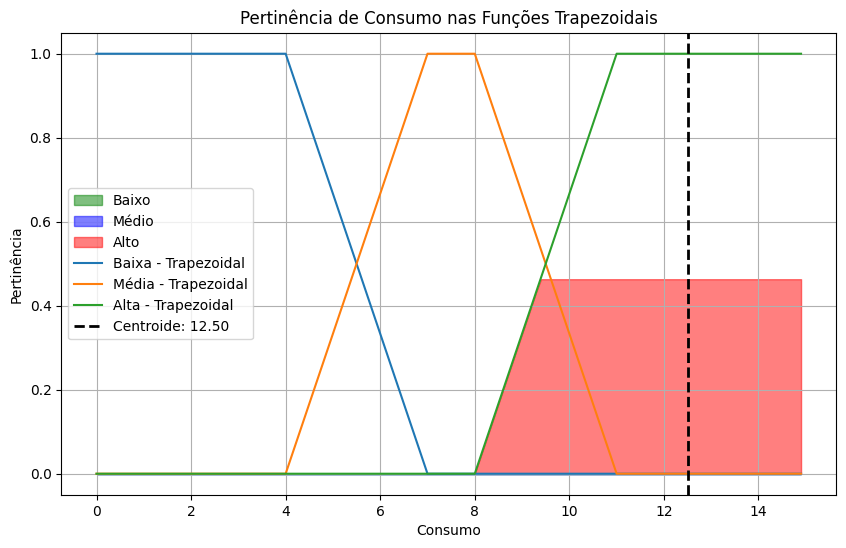

Regra Disparada:  6  - Grau de Disparo:  1
Grau de Ativação dos Conjuntos Fuzzy do Consequente:  {1: 0, 2: 1, 3: 0}
Consumo Final usando o Centróide:  7.5


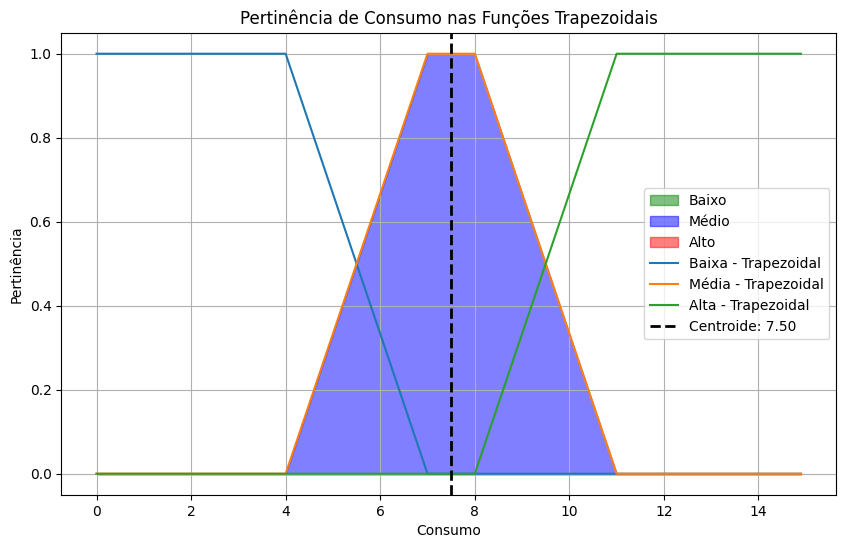

Regra Disparada:  3  - Grau de Disparo:  0.29908755412652643
Regra Disparada:  7  - Grau de Disparo:  0.7009124458734736
Grau de Ativação dos Conjuntos Fuzzy do Consequente:  {1: 0, 2: 0.29908755412652643, 3: 0.7009124458734736}
Consumo Final usando o Centróide:  11.00456222936737


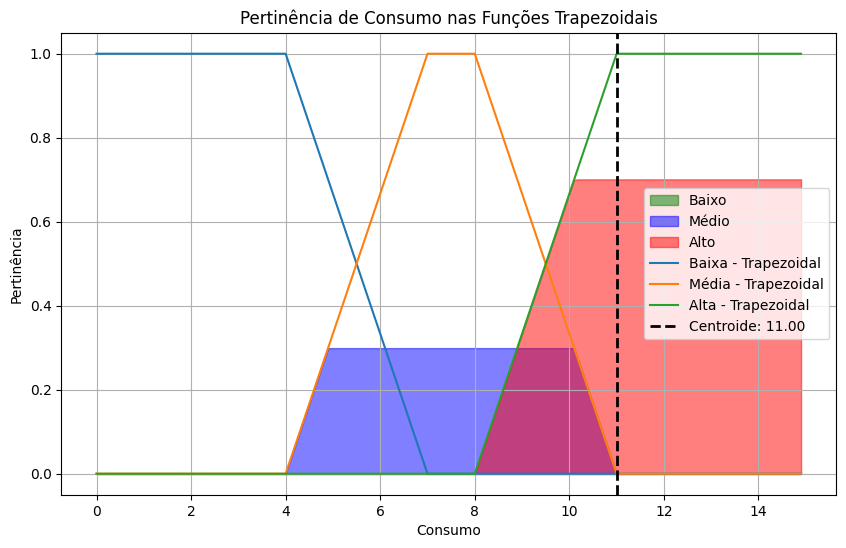

Regra Disparada:  2  - Grau de Disparo:  0.6384653808815749
Regra Disparada:  8  - Grau de Disparo:  0.3615346191184251
Grau de Ativação dos Conjuntos Fuzzy do Consequente:  {1: 0.6384653808815749, 2: 0.3615346191184251, 3: 0}
Consumo Final usando o Centróide:  4.307673095592126


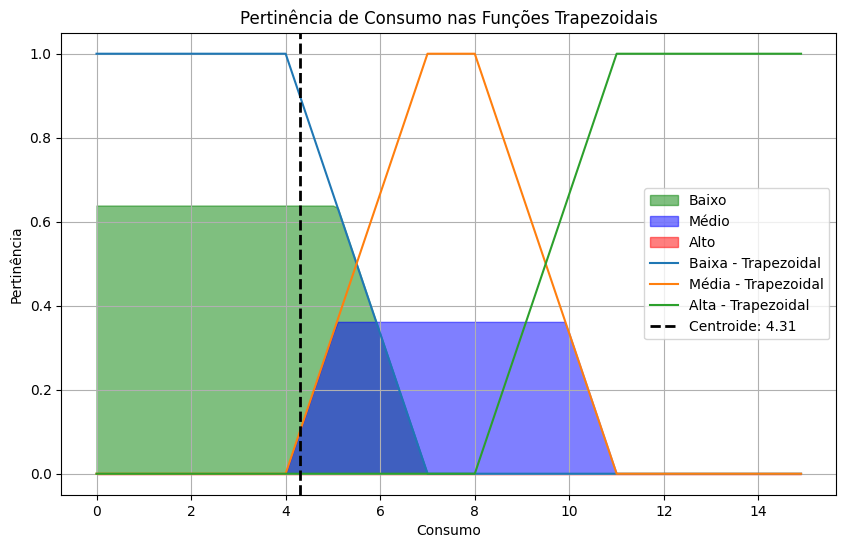

Regra Disparada:  7  - Grau de Disparo:  0.17197544540757762
Grau de Ativação dos Conjuntos Fuzzy do Consequente:  {1: 0, 2: 0, 3: 0.17197544540757762}
Consumo Final usando o Centróide:  12.5


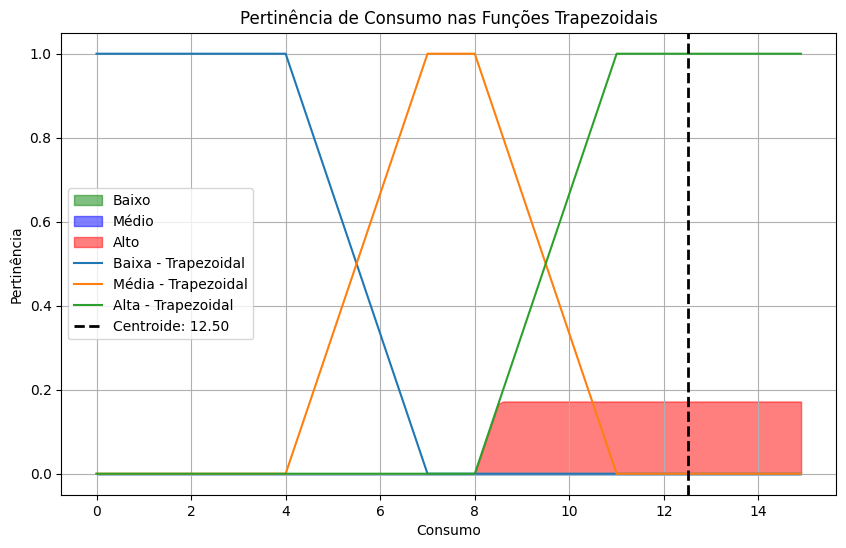

Grau de Ativação dos Conjuntos Fuzzy do Consequente:  {1: 0, 2: 0, 3: 0}


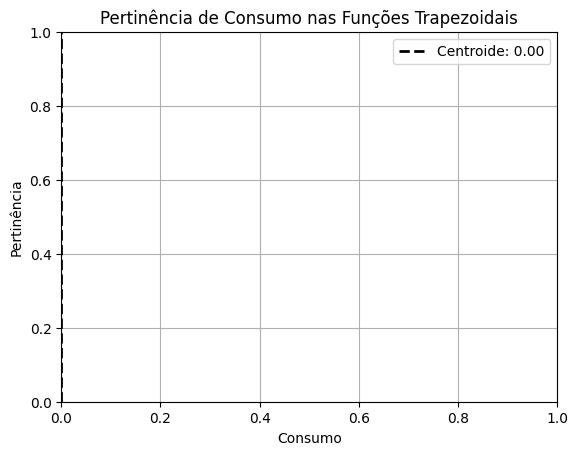

Regra Disparada:  13  - Grau de Disparo:  1
Grau de Ativação dos Conjuntos Fuzzy do Consequente:  {1: 1, 2: 0, 3: 0}
Consumo Final usando o Centróide:  2.5


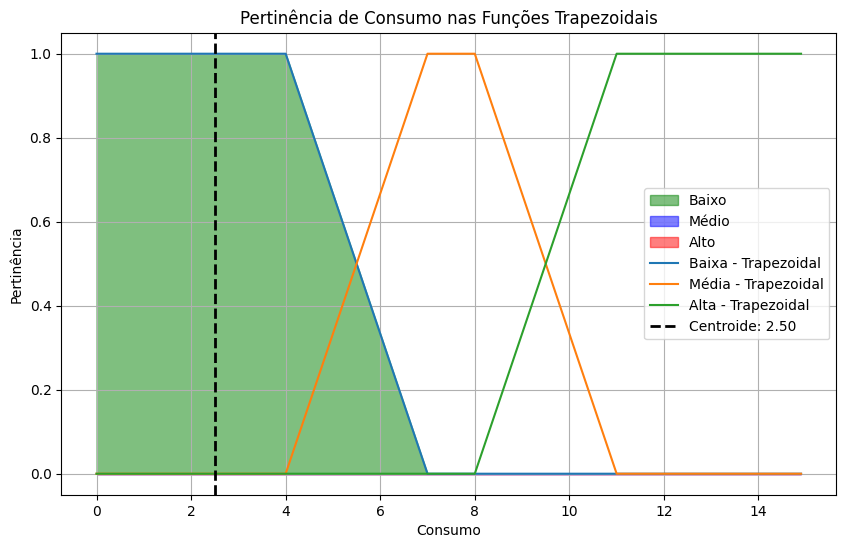

Regra Disparada:  7  - Grau de Disparo:  1
Grau de Ativação dos Conjuntos Fuzzy do Consequente:  {1: 0, 2: 0, 3: 1}
Consumo Final usando o Centróide:  12.5


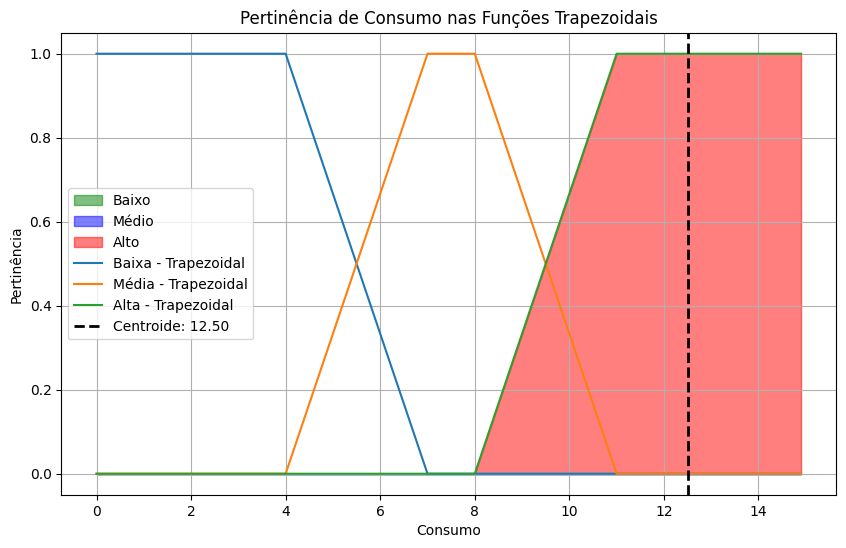

Regra Disparada:  7  - Grau de Disparo:  0.005720965124586997
Regra Disparada:  8  - Grau de Disparo:  0.994279034875413
Grau de Ativação dos Conjuntos Fuzzy do Consequente:  {1: 0, 2: 0.994279034875413, 3: 0.005720965124586997}
Consumo Final usando o Centróide:  7.528604825622935


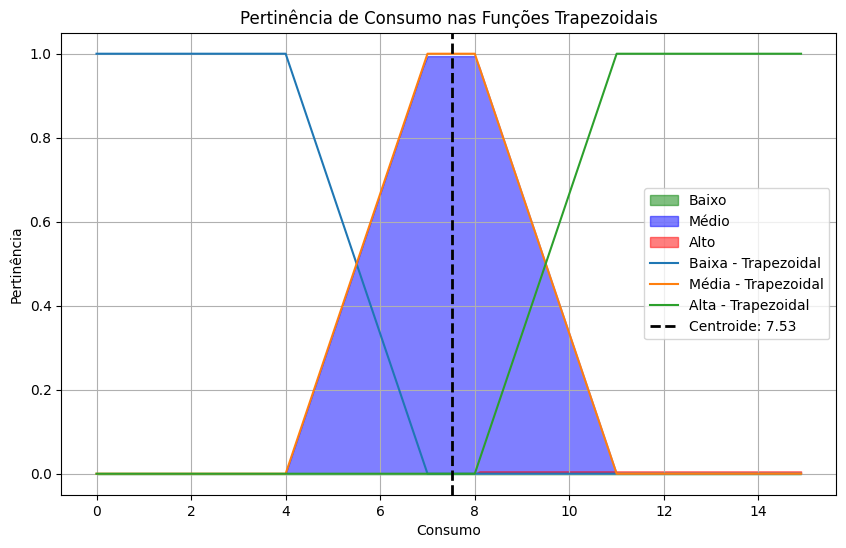

Regra Disparada:  15  - Grau de Disparo:  1
Grau de Ativação dos Conjuntos Fuzzy do Consequente:  {1: 0, 2: 0, 3: 1}
Consumo Final usando o Centróide:  12.5


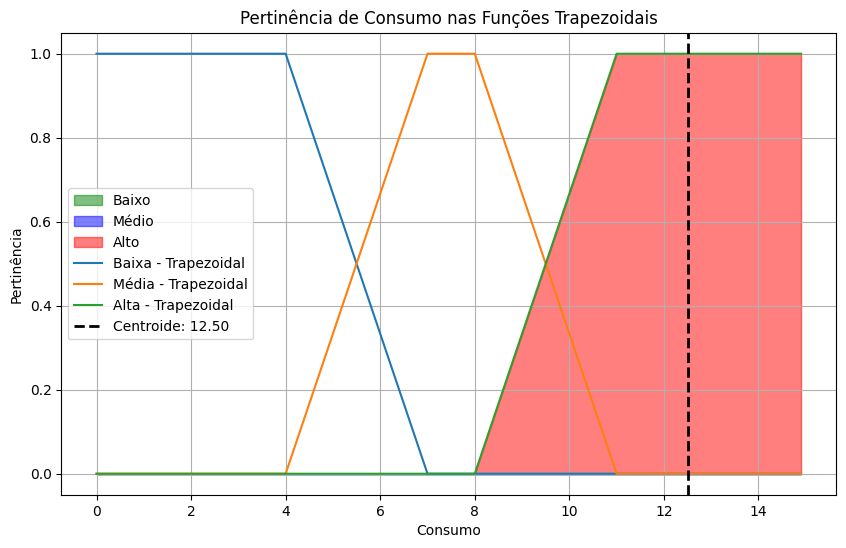

Regra Disparada:  14  - Grau de Disparo:  0.8709274203836632
Regra Disparada:  20  - Grau de Disparo:  0.06453628980816842
Grau de Ativação dos Conjuntos Fuzzy do Consequente:  {1: 0, 2: 0.8709274203836632, 3: 0.06453628980816842}
Consumo Final usando o Centróide:  7.844942776000013


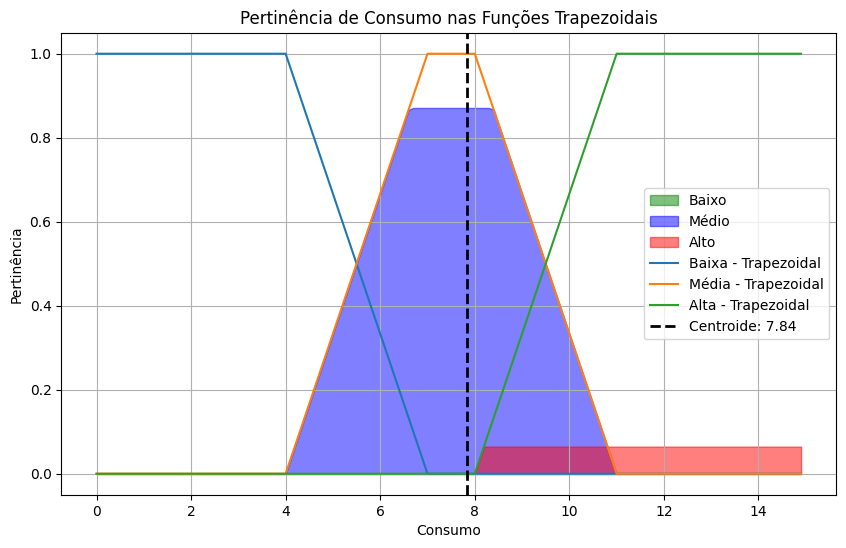

Regra Disparada:  16  - Grau de Disparo:  0.589715968518885
Grau de Ativação dos Conjuntos Fuzzy do Consequente:  {1: 0, 2: 0.589715968518885, 3: 0}
Consumo Final usando o Centróide:  7.5


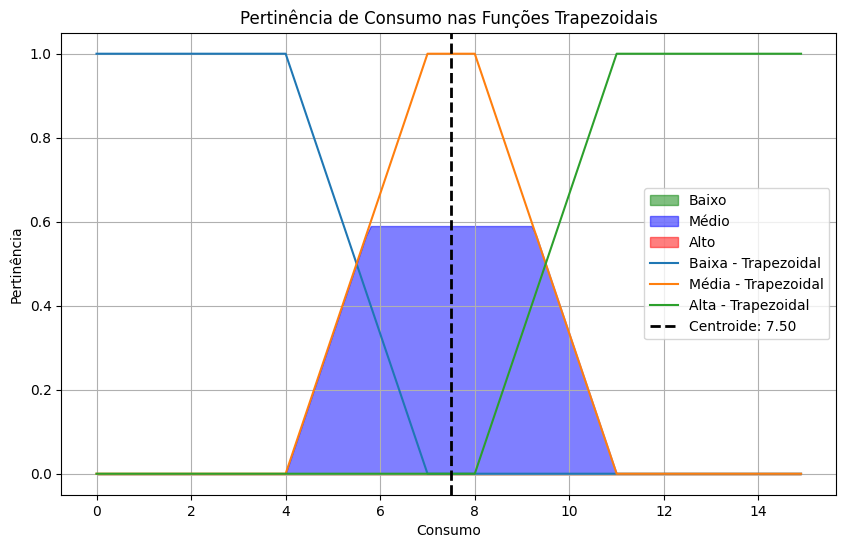

Regra Disparada:  13  - Grau de Disparo:  0.26089380962060316
Regra Disparada:  19  - Grau de Disparo:  0.3695530951896984
Grau de Ativação dos Conjuntos Fuzzy do Consequente:  {1: 0.26089380962060316, 2: 0.3695530951896984, 3: 0}
Consumo Final usando o Centróide:  5.430881985223602


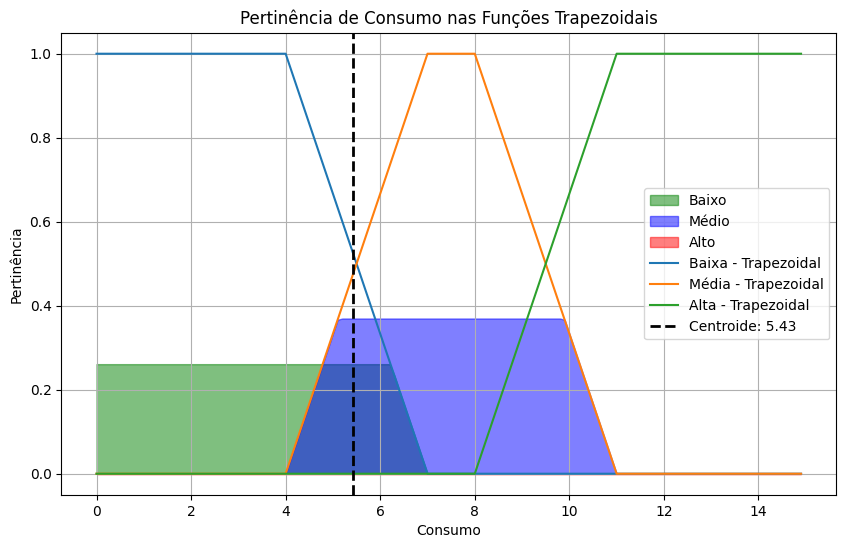

Regra Disparada:  12  - Grau de Disparo:  0.76179349442628
Regra Disparada:  18  - Grau de Disparo:  0.11910325278686003
Grau de Ativação dos Conjuntos Fuzzy do Consequente:  {1: 0, 2: 0, 3: 0.76179349442628}
Consumo Final usando o Centróide:  12.5


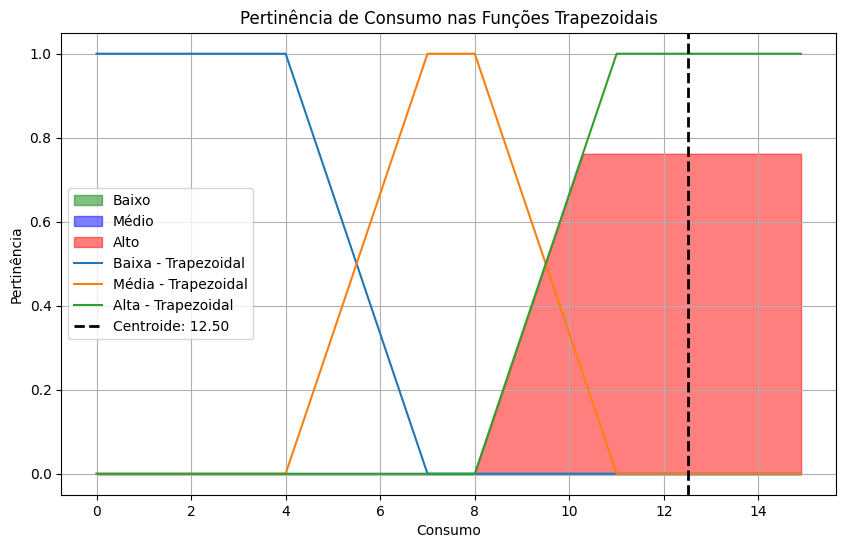

Regra Disparada:  21  - Grau de Disparo:  1
Grau de Ativação dos Conjuntos Fuzzy do Consequente:  {1: 0, 2: 0, 3: 1}
Consumo Final usando o Centróide:  12.5


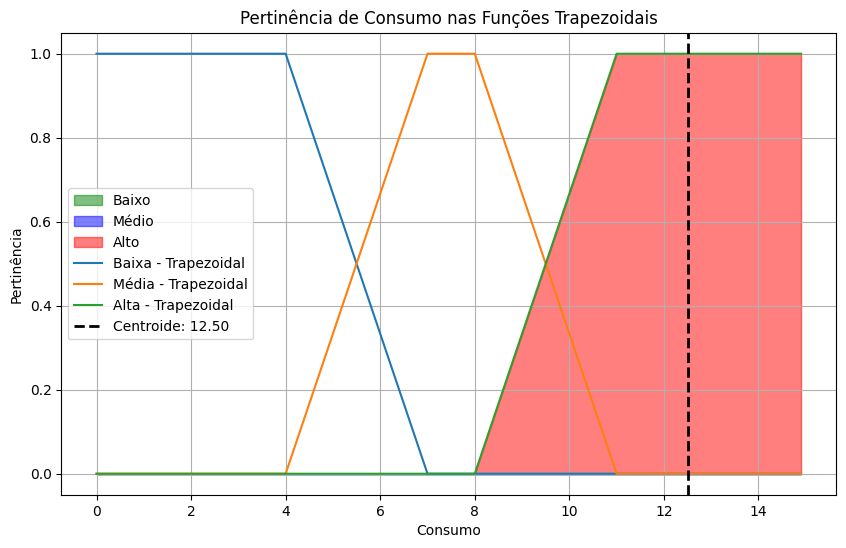

Regra Disparada:  19  - Grau de Disparo:  0.776332858488933
Grau de Ativação dos Conjuntos Fuzzy do Consequente:  {1: 0, 2: 0.776332858488933, 3: 0}
Consumo Final usando o Centróide:  7.5


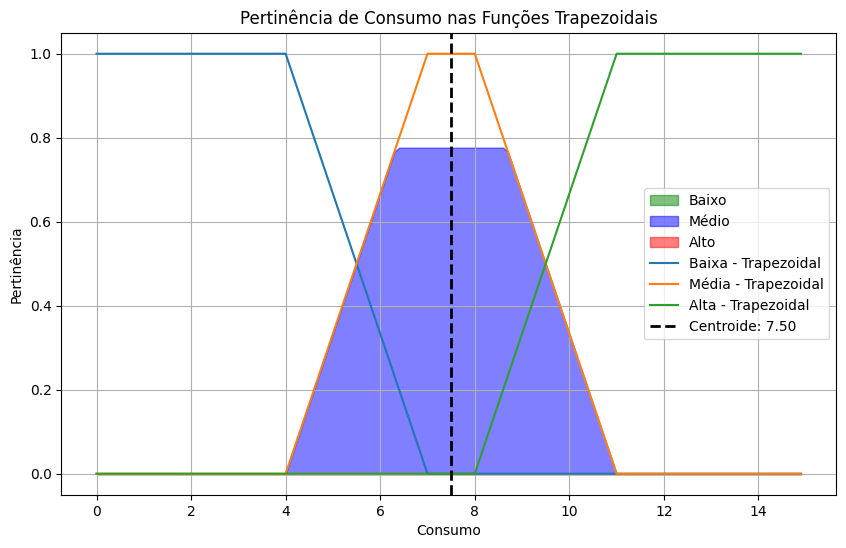

Regra Disparada:  14  - Grau de Disparo:  0.18856613737054992
Grau de Ativação dos Conjuntos Fuzzy do Consequente:  {1: 0, 2: 0.18856613737054992, 3: 0}
Consumo Final usando o Centróide:  7.5


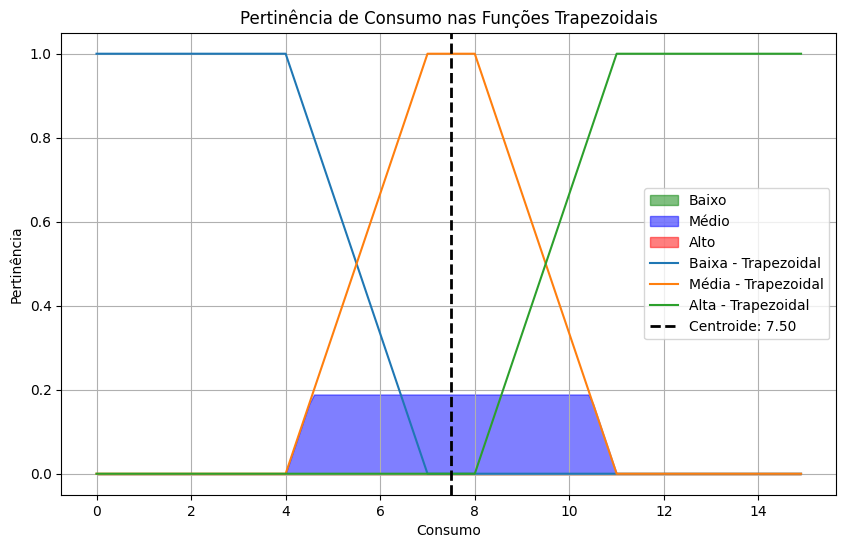

Grau de Ativação dos Conjuntos Fuzzy do Consequente:  {1: 0, 2: 0, 3: 0}


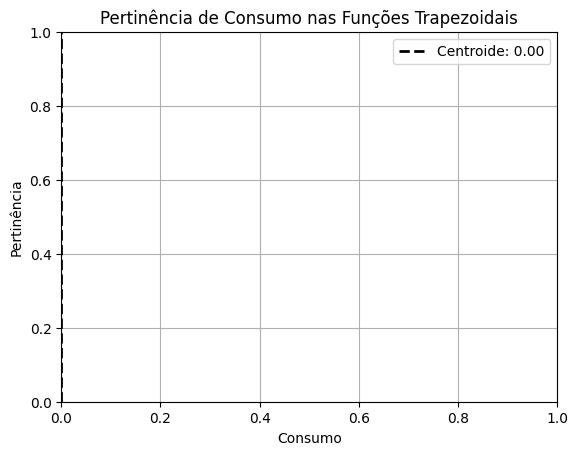

Grau de Ativação dos Conjuntos Fuzzy do Consequente:  {1: 0, 2: 0, 3: 0}


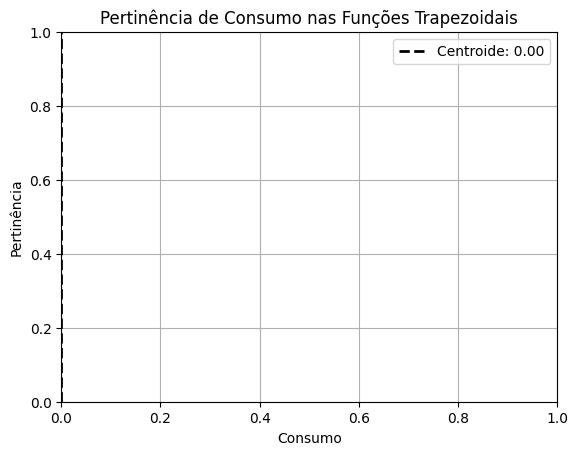

Grau de Ativação dos Conjuntos Fuzzy do Consequente:  {1: 0, 2: 0, 3: 0}


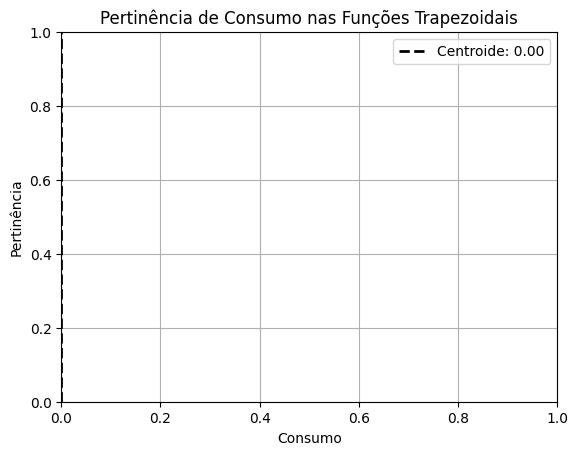

Regra Disparada:  6  - Grau de Disparo:  1
Grau de Ativação dos Conjuntos Fuzzy do Consequente:  {1: 0, 2: 1, 3: 0}
Consumo Final usando o Centróide:  7.5


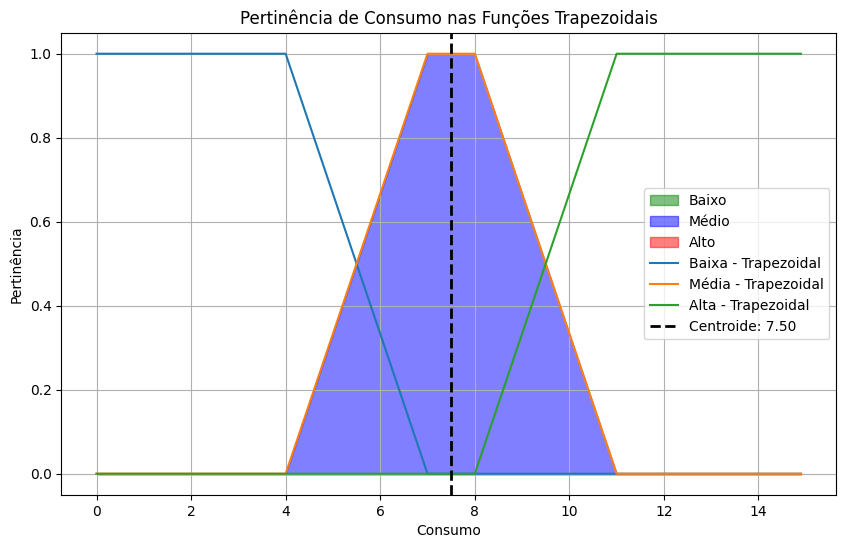

Regra Disparada:  11  - Grau de Disparo:  0.13657517611777586
Regra Disparada:  12  - Grau de Disparo:  0.8634248238822242
Grau de Ativação dos Conjuntos Fuzzy do Consequente:  {1: 0, 2: 0.13657517611777586, 3: 0.8634248238822242}
Consumo Final usando o Centróide:  11.817124119411123


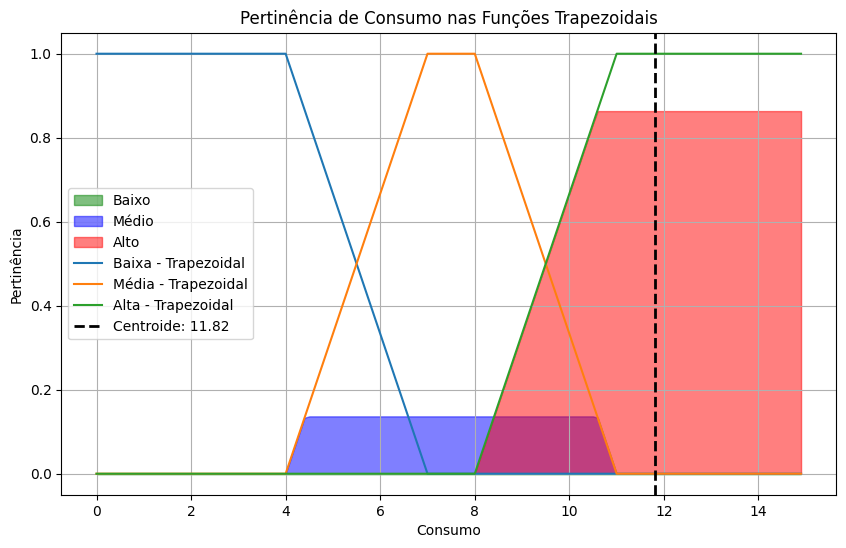

[0, 2.5, 9.93605115566201, 2.556650345389844, 12.5, 0, 12.5, 2.5, 12.5, 2.5, 2.5, 7.5, 12.5, 2.5, 12.5, 0, 12.5, 7.5, 12.5, 10.344558782311838, 7.5, 12.5, 12.5, 7.5, 7.183516524468301, 7.5, 12.5, 0, 12.5, 12.5, 2.5, 2.5, 2.5, 2.5, 0, 11.701572843131736, 7.5, 2.5, 7.5, 7.5, 7.5, 12.5, 12.5, 7.5, 3.918774933293855, 12.5, 7.5, 2.5, 7.5, 6.404348345516418, 12.5, 0, 2.5, 7.5, 12.5, 0, 12.5, 7.5, 7.5, 8.346424062729003, 5.677083578902444, 7.5, 7.5, 2.5, 0, 0, 2.5, 0, 9.157885546134985, 12.5, 7.5, 7.5, 7.5, 12.5, 2.5, 7.5, 12.5, 7.5, 12.5, 7.5, 11.00456222936737, 4.307673095592126, 12.5, 0, 2.5, 12.5, 7.528604825622935, 12.5, 7.844942776000013, 7.5, 5.430881985223602, 12.5, 12.5, 7.5, 7.5, 0, 0, 0, 7.5, 11.817124119411123]


<ipython-input-8-ec4e7123b940>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Eficiencia'] = df['Consumo Final'] / df['Velocidade']


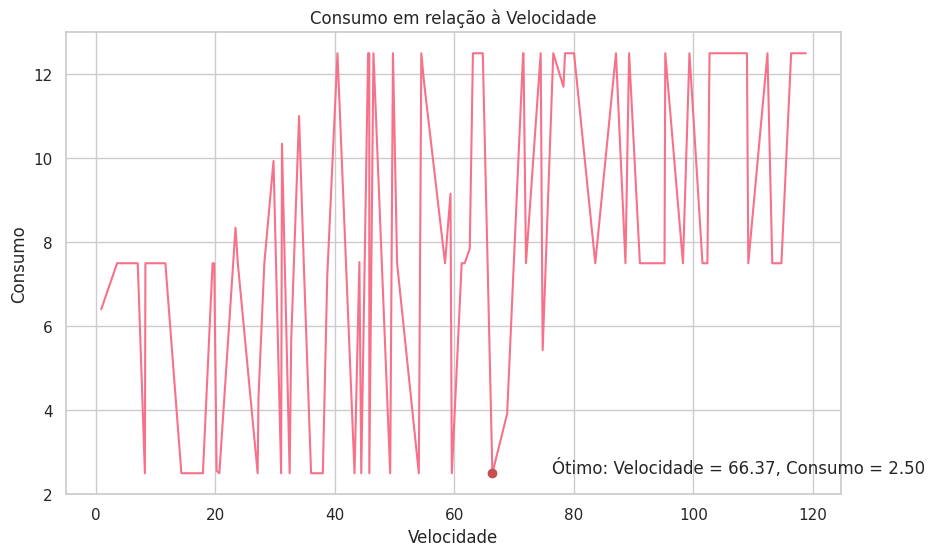

In [ ]:
# Crie uma lista para armazenar os valores de consumo final
listconsumo_final = []

# Itere pelas linhas do DataFrame e aplique a função a cada linha
for index, row in df.iterrows():
    velocidade = row['Velocidade']
    marcha = row['Marcha']
    inclinacao = row['Inclinacao']

    consumo_final = InferenciaFuzzy(velocidade, marcha, inclinacao)
    listconsumo_final.append(consumo_final)

print(listconsumo_final)

# Adicione uma coluna ao DataFrame para o Consumo Final
df['Consumo Final'] = listconsumo_final

df = df[df['Consumo Final'] != 0]

# Ordene o DataFrame com base na coluna "Velocidade"
# df = df.sort_values(by='Velocidade')

# Defina o estilo e a estética do Seaborn
sns.set(style="whitegrid")
sns.set_palette("husl")

# Encontre a velocidade ótima de utilização (mínimo consumo de combustível)
min_consumo = df['Consumo Final'].min()

# Calcular a eficiência (consumo por unidade de velocidade)
df['Eficiencia'] = df['Consumo Final'] / df['Velocidade']

# Encontrar a velocidade ótima (minimizar a eficiência)
min_eficiencia = df['Eficiencia'].min()
velocidade_otima = df[df['Eficiencia'] == min_eficiencia]['Velocidade'].values[0]

# Encontrar o índice do valor de velocidade mais próximo do valor ótimo
nearest_idx = (df['Velocidade'] - velocidade_otima).abs().idxmin()
nearest_velocidade = df.loc[nearest_idx, 'Velocidade']
nearest_consumo = df.loc[nearest_idx, 'Consumo Final']

# Plote um gráfico de consumo em relação à velocidade
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='Velocidade', y='Consumo Final')
plt.xlabel("Velocidade")
plt.ylabel("Consumo")
plt.title("Consumo em relação à Velocidade")
plt.grid(True)

# Marque o ponto ótimo no gráfico
plt.plot(nearest_velocidade, nearest_consumo, 'ro')
plt.text(nearest_velocidade + 10, nearest_consumo, f'Ótimo: Velocidade = {nearest_velocidade:.2f}, Consumo = {nearest_consumo:.2f}',
         horizontalalignment='left')
plt.show()